<div style="border: 1px solid thistle; padding: 5px 20px 10px 20px;">
    <h2><font color = "77658f" style=";">Feedback</font></h2><br>
    <font color = "77658f">Easy to understand your algorithmic logic. Certain parts of code readability could be improved, such as inserting a line break in between long lines of codes. Good job with the plots, with appropriate size, titles etc. Would prefer a list of citations at the end of the report instead of inserting URLs after every sentence.<br><br>
        • Project Organisation: <b>Meet Requirement</b> <br>
        • Python Syntax and Control Flow: <b>Meet Portfolio Expectations</b><br>
        • Data Cleaning and EDA: <b>Meet Requirement</b><br>
        • Visualisations: <b>Meet Requirement</b><br>
        • Research and Conceptual Understanding: <b>Meet Minimum Requirement</b><br> 
    </font>
</div>

# Project 1: SAT and ACT Analysis
Group 4 - Munish T. Bawa


## Problem Statement

The data science team at College Board is tasked to present a summary of SAT participation rates for each state and to recommened an effective utilization of limited marketing spend to boost participation rates in 2019.

Background: The College Board is an organization administering the SAT and released new format for SAT in Mar 2016. The organization tracks participation rates for each state in unitied states of America.

About College Board:


The College Board is a head quartered in New york and is a dynamic member-led, mission-driven not-for-profit 
organization governed by an elected Board of Trustees with guidance from three national assemblies and 
six regional assemblies.

More than 6,000 two- and four-year colleges, universities, secondary schools and districts, 
higher education systems, and other nonprofit organizations compose the College Board.

Each member institution appoints delegates to serve on our three national assemblies:

    Academic Assembly
    CSS/Financial Assistance Assembly
    Counseling and Admission Assembly

Representatives share in the governance of the College Board and define its core strengths and values. 
They provide a direct link between institutions and the College Board. 
Representatives attend regional and national assembly meetings to give voice to concerns and 
cast votes on behalf of institutions.

Matters are typically presented to the membership at the annual meeting and include business such as 
approval of new members and election of College Board Trustees, who oversee a number of Trustee Committees


## Project objectives

Visualise data gathered from SAT scores/participation rates from last 2 years (2017 and 2018)
Also looked at data from comparative test ACT for similar period. 

Recommend 1 state with a low participation rate based on insights generated from last 2 years data

## Data Insights

Increase in SAT participation rate the following year does not seem to be related to ACT participation rates.
Two states with maximum increase in SAT participation rates (Illinois, Colorado) had nearly 100% ACT participation


On comparing alternate indepdent sources, we find the common pattern 

    
Both college admissions exams are wildly popular and Students are increasingly taking both the SAT and ACT.
In 2018, 2.1 million test-takers completed the SAT and 1.9 million students took the ACT.
https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take

Changes made to the SAT in 2016 have made it easier than ever to prep for both tests concurrently.
https://www.princetonreview.com/college/sat-act 

SAT is comparatively cheaper
The SAT costs $47.50 for the test only and $64.50 if the optional essay is included. 
The ACT costs $50.50 for only the exam and $67 if the optional writing test is included

Other sources referred to in study
Illinois launched a competitive process for a new contract, which the SAT won with a proposal that was $1.37 million less than the ACT over three years. - https://www.nbcchicago.com

Colorado cites cost savings as one of the reasons reasons it switched from ACT to SAT. - https://www.coloradokids.org

Michigan's switch to SAT lowered costs for the state. - https://www.mlive.com

Data for debt load of US states. - https://www.worldatlas.com/articles/us-states-with-the-most-debt.html

## Recommendations
Marketing team should focus on improving participation rates in Arizona,Nevada

For details please refer to Technical solution details below

## TECHNICAL SOLUTION DETAILS 


### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*Libraries used*

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

<font size = 3 color = red>Good practice of defining default path variable!</font>

In [2]:
file_pth = "../data/"

df_sat_2017 = pd.read_csv(file_pth+"sat_2017.csv")
df_act_2017 = pd.read_csv(file_pth+"act_2017.csv")

# df_sat_2017 = pd.read_csv('../data/sat_2017.csv')
# df_act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
df_sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
df_sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [5]:
df_act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [6]:
df_act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<font size = 3 color = red>Would be good to also include descriptions about the data characteristics too. E.g. number of columns, shape<br>
Formatting for the statistical details could be better formatted! Don't lump them all in one line</font>

Answer: 

Dataset SAT2017 contains the following information for each state
1,2) Participation rates for all each state
3) Evidence-based reading and writing (ERW) scores, 
4) Math scores and 
5) Total commulative scores for both subjects (ERW, Maths) for each state. 

Evidence-Based Reading and Writing 	Math 	Total


There are 51 counts of data in total. 
The mean ERW score is 569.12, with a standard deviation of 45.67. 
        count     51.000000
        mean     569.117647
        std       45.666901
        min      482.000000
        25%      533.500000
        50%      559.000000
        75%      613.000000
        max      644.000000
The mean Math score is 547.63, with a standard deviation of 84.91.
        count     51.000000
        mean     547.627451
        std       84.909119
        min       52.000000
        25%      522.000000
        50%      548.000000
        75%      599.000000
        max      651.000000

Dataset ACT2017 contains the following information for each state
participation rates, 
English, 
Math, 
Reading, 
Science and 
composite scores. 

There are 52 counts of data in total (51 states + national average). 
The composite score is the average of the scores on each test for english, math, reading and science.
The describe() function is inaccurate because it includes the data for the first row 'National'.

#### 4a. Does the data look complete? 

Answer: Yes

<font size = 3 color = red>How can you tell? Elaborate more on the measures you took to ensure completeness. Did you check for any null values?</font>

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

For SAT, min score = 400, max score = 1600

For ACT, min score = 1, max score = 36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
# Discrepancies were identified by comparing the dataset provided with online sources, 
#using an excel match function.

df_sat_2017['Math'].iloc[20] = 524
df_act_2017['Composite'].iloc[51] = 20.2
df_act_2017['Science'].iloc[21] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
df_sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
df_act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

For both SAT and ACT, the 'Participation' column data type should be *int* instead of *object*. 
For ACT, the 'Composite' values column data type should be *float*.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
# Function to convert string objects from 'Participation' column to integer values. 
def convertStrToInt(x):
    if type(x)==str:
        return int(x.replace('%',''))   # Remove % before conversion. 

# Function to convert string objects to float.
def convertStrToFloat(x):
    return float(x)

<font size = 3 color = red>Dont necessarily have to create a function to convert a value to float, when float() already existed</font>

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
df_sat_2017['Participation'] = df_sat_2017['Participation'].apply(convertStrToInt)
df_act_2017['Participation'] = df_act_2017['Participation'].apply(convertStrToInt)
df_act_2017['Composite'] = df_act_2017['Composite'].apply(convertStrToFloat)

- Display the data types again to confirm they are correct.

In [12]:
print(df_sat_2017.dtypes)
df_sat_2017.head()

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [13]:
print(df_act_2017.dtypes)
df_act_2017.head()

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [14]:
# Function to rename column names in unique format: type_colName_year
def renameCols(colName,testType,year):
    if type(colName) == str and colName[:3] != testType and colName[:-4] != year:
        colName = (testType + ' ' + colName.lower() + ' ' + year).replace(' ','_')
    return colName

In [15]:
df_sat_2017.columns = [renameCols(i,'sat','2017') for i in df_sat_2017.columns]
df_act_2017.columns = [renameCols(i,'act','2017') for i in df_act_2017.columns]

In [ ]:
#Inspect the renamed columns

In [16]:
df_sat_2017.head()

,sat_state_2017,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [17]:
df_act_2017.head()

,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|sat_state_2017|*object*|SAT|SAT State| 
|sat_participation_2017|*int*|SAT|SAT Participation Rate| 
|sat_evidence-based_reading_and_writing_2017|*int*|SAT|SAT Evidence-based Reading and Writing (ERW) Scores| 
|sat_math_2017|*int*|SAT|SAT Math Scores| 
|sat_total_2017|*int*|SAT|SAT Total Scores| 
|act_state_2017|*object*|ACT|ACT State| 
|act_participation_2017|*int*|ACT|ACT Participation Rate| 
|act_english_2017|*float*|ACT|ACT English Scores| 
|act_math_2017|*float*|ACT|ACT Math Scores| 
|act_reading_2017|*float*|ACT|ACT Reading Scores| 
|act_science_2017|*float*|ACT|ACT Science Scores| 
|act_composite_2017|*float*|ACT|ACT Composite Scores| 



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [18]:
# Remove the row 'National' from ACT dataset
df_act_2017.drop([0],inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [19]:
# Set index of both SAT and ACT dataframes to the 'State'
df_sat_2017.set_index('sat_state_2017', inplace=True)
df_act_2017.set_index('act_state_2017', inplace=True)

In [20]:
# Join() function combines both SAT and ACT dataframes by their index by default
df_combined_2017 = df_sat_2017.join(df_act_2017)
df_combined_2017.index.names = ['state']

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [21]:
df_combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [22]:
df_sat_2018 = pd.read_csv('../data/sat_2018.csv')
df_act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [23]:
df_sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [24]:
df_act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [25]:

df_sat_2018['Participation'] = df_sat_2018['Participation'].apply(convertStrToInt)

# For the 2018 ACT data, the data types for 'Percentage of Students Tested' and 'Average Composite Score'
# are already numberical (int and float respectively), so we don't have do conversion for these columns

# Rename columns using the same function as for the 2017 data
df_sat_2018.columns = [renameCols(i,'sat','2018') for i in df_sat_2018.columns]
df_act_2018.columns = [renameCols(i,'act','2018') for i in df_act_2018.columns]

# Join the 2018 SAT and ACT dataframes
df_sat_2018.set_index('sat_state_2018', inplace=True)
df_act_2018.set_index('act_state_2018', inplace=True)

df_combined_2018 = df_sat_2018.join(df_act_2018)
df_combined_2018.head()

,sat_participation_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_percentage_of_students_tested_2018,act_average_composite_score_2018,act_average_english_score_2018,act_average_math_score_2018,act_average_reading_score_2018,act_average_science_score_2018
sat_state_2018,,,,,,,,,,
Alabama,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
Alaska,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
Arizona,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
Arkansas,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
California,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


In [26]:
# Discrepancies were identified by comparing the dataset provided with online sources, 
# using an excel match function.

df_combined_2018['act_average_composite_score_2018'].iloc[7] = 23.8

df_combined_2018['sat_participation_2018'].iloc[9] = 97
df_combined_2018['sat_evidence-based_reading_and_writing_2018'].iloc[9] = 522
df_combined_2018['sat_math_2018'].iloc[9] = 493
df_combined_2018['sat_total_2018'].iloc[9] = 1014

df_combined_2018['sat_evidence-based_reading_and_writing_2018'].iloc[11] = 550
df_combined_2018['sat_math_2018'].iloc[11] = 549
df_combined_2018['sat_total_2018'].iloc[11] = 1099

df_combined_2018['sat_participation_2018'].iloc[14] = 67
df_combined_2018['sat_evidence-based_reading_and_writing_2018'].iloc[14] = 546
df_combined_2018['sat_math_2018'].iloc[14] = 539
df_combined_2018['sat_total_2018'].iloc[14] = 1086

df_combined_2018['sat_total_2018'].iloc[41] = 1241

df_combined_2018['sat_evidence-based_reading_and_writing_2018'].iloc[44] = 618
df_combined_2018['sat_math_2018'].iloc[44] = 612
df_combined_2018['sat_total_2018'].iloc[44] = 1230

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`. (sat_act_combined.csv)

**Use this combined dataframe for the remainder of the project**.

In [27]:
# Join the 2017 and 2018 dataframes
df_sat_act_combined = df_combined_2017.join(df_combined_2018)
df_sat_act_combined.head()

,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_percentage_of_students_tested_2018,act_average_composite_score_2018,act_average_english_score_2018,act_average_math_score_2018,act_average_reading_score_2018,act_average_science_score_2018
state,,,,,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


In [28]:
# Save the combined dataframe to csv
df_sat_act_combined.to_csv('../data/sat_act_combined.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [29]:
# Use the describe function for quick overview of each numeric feature, then transpose
df_sat_act_combined.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_evidence-based_reading_and_writing_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

<font size = 3 color = red>You can use the += feature in python instead (Refer to the ###comments### in the code)<br><br>
The task is to define a function to calculate the stdev. Your code is slightly off the instructions given, but no issues with the algorithm </font>

In [30]:
# Calculate standard deviation of the feature 'sat_participation_2017', using the formula above
import math

diff_sum = 0
mean_sum = df_sat_act_combined['sat_participation_2017'].mean()

for i in df_sat_act_combined['sat_participation_2017']:
    diff_sum = diff_sum + ((i-mean_sum)**2)                 ### diff_sum += ((i-mean_sum)**2) ###
    
std_dev = math.sqrt(diff_sum/(len(df_sat_act_combined['sat_participation_2017'])))

# Print standard deviation of the feature 'sat_participation_2017', derived from 3 different methods: pandas, numpy, formula
print('Std using df.std:', df_sat_act_combined['sat_participation_2017'].std())
print('Std using np.std:', np.std(df_sat_act_combined['sat_participation_2017']))
print('Std using manual formula calculation:', std_dev)

Std using df.std: 35.276632270013046
Std using np.std: 34.92907076664508
Std using manual formula calculation: 34.92907076664508


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [31]:
def std_dev(value):
    diff_sum = 0
    mean_sum = 0
    count = 0
    for k, v in value.items():
        mean_sum = mean_sum + v
        count+=1
    mean_sum = mean_sum/count
    for k, v in value.items():
        diff_sum = diff_sum + ((v-mean_sum)**2)
    return math.sqrt(diff_sum/count)
    
sd = df_sat_act_combined.to_dict()
sd = {k:std_dev(v) for (k,v) in sd.items()}
sd

{'sat_participation_2017': 34.92907076664508,
 'sat_evidence-based_reading_and_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 37.63965409204986,
 'sat_evidence-based_reading_and_writing_2018': 44.87118561762388,
 'sat_math_2018': 48.40589946919447,
 'sat_total_2018': 92.94372462792965,
 'act_percentage_of_students_tested_2018': 33.745194881997506,
 'act_average_composite_score_2018': 2.0968220768561987,
 'act_average_english_score_2018': 2.4222536143202795,
 'act_average_math_score_2018': 2.015707255555717,
 'act_average_reading_score_2018': 2.145891884510421,
 'act_average_science_score_2018': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: 

No, the manually calculated standard deviations do not match up with the output from pandas describe() function. This is because the pandas describe() function has the default input ddof=1, which means the divisor used = N-ddof, where N represents the number of elements. This is different from the formula which uses divisor = N. Numpy's std method gives the same standard deviation as the formula, because the default value for ddof=0.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [32]:
# Create additional columns to analyse changes in the SAT participation rates and test scores from 2017 to 2018

df_sat_act_combined['sat_participation_improvement'] = df_sat_act_combined['sat_participation_2018'] - df_sat_act_combined['sat_participation_2017']
df_sat_act_combined['sat_erw_improvement'] = df_sat_act_combined['sat_evidence-based_reading_and_writing_2018'] - df_sat_act_combined['sat_evidence-based_reading_and_writing_2017']
df_sat_act_combined['sat_math_improvement'] = df_sat_act_combined['sat_math_2018'] - df_sat_act_combined['sat_math_2017']
df_sat_act_combined['sat_total_improvement'] = df_sat_act_combined['sat_total_2018'] - df_sat_act_combined['sat_total_2017']

In [33]:
df_sat_act_combined.head()

,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,act_percentage_of_students_tested_2018,act_average_composite_score_2018,act_average_english_score_2018,act_average_math_score_2018,act_average_reading_score_2018,act_average_science_score_2018,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,...,100,19.1,18.9,18.3,19.6,19.0,1,2,-1,1
Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,...,33,20.8,19.8,20.6,21.6,20.7,5,15,11,26
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,...,66,19.2,18.2,19.4,19.5,19.2,-1,14,19,33
Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,...,100,19.4,19.1,18.9,19.7,19.4,2,-22,-18,-39
California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,...,27,22.7,22.5,22.5,23.0,22.1,7,9,12,21


In [34]:
# Create additional columns to analyse changes in the ACT participation rates and test scores from 2017 to 2018

df_sat_act_combined['act_participation_improvement'] = df_sat_act_combined['act_percentage_of_students_tested_2018'] - df_sat_act_combined['act_participation_2017']
df_sat_act_combined['act_english_improvement'] = df_sat_act_combined['act_average_english_score_2018'] - df_sat_act_combined['act_english_2017']
df_sat_act_combined['act_math_improvement'] = df_sat_act_combined['act_average_math_score_2018'] - df_sat_act_combined['act_math_2017']
df_sat_act_combined['act_reading_improvement'] = df_sat_act_combined['act_average_reading_score_2018'] - df_sat_act_combined['act_reading_2017']
df_sat_act_combined['act_science_improvement'] = df_sat_act_combined['act_average_science_score_2018'] - df_sat_act_combined['act_science_2017']
df_sat_act_combined['act_composite_improvement'] = df_sat_act_combined['act_average_composite_score_2018'] - df_sat_act_combined['act_composite_2017']

In [35]:
df_sat_act_combined.head()

,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,...,1,2,-1,1,0,0.0,-0.1,-0.1,-0.4,-0.1
Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,...,5,15,11,26,-32,1.1,0.8,1.2,0.8,1.0
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,...,-1,14,19,33,4,-0.4,-0.4,-0.6,-0.6,-0.5
Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,...,2,-22,-18,-39,0,0.2,-0.1,0.0,-0.1,0.0
California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,...,7,9,12,21,-4,0.0,-0.2,-0.1,-0.1,-0.1


<font size = 3 color = red>Please hide the irrelevant columns when you present your answers for all the questions asking for the top/bottom 5 states with highest/lowest scores. It dramatically reduces readability when you include all columns.</font>

In [36]:
# Filter dataframe to include states with more than 95% SAT Participation Rates in 2017
# Compute the means for 2017 ERW, Math and Total Scores
# Print data of top 5 states with highest SAT Participation Rates in 2017

print('SAT Average Scores for States with more than 95% Participation Rate in 2017:')
print('ERW:', df_sat_act_combined[df_sat_act_combined['sat_participation_2017'] > 95]['sat_evidence-based_reading_and_writing_2017'].mean())
print('Math:',df_sat_act_combined[df_sat_act_combined['sat_participation_2017'] > 95]['sat_math_2017'].mean())
print('Total:',df_sat_act_combined[df_sat_act_combined['sat_participation_2017'] > 95]['sat_total_2017'].mean())
print('Top 5 States with Highest SAT Participation Rates in 2017:')

df_sat_act_combined.sort_values(by='sat_participation_2017', ascending=False).head()

SAT Average Scores for States with more than 95% Participation Rate in 2017:
ERW: 511.2
Math: 497.4
Total: 1008.8
Top 5 States with Highest SAT Participation Rates in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,...,-8,15,12,27,0,-0.7,-0.8,-0.5,-0.5,-0.6
Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,...,0,2,4,6,-7,0.4,0.2,0.2,0.1,0.3
Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,...,0,5,7,12,-5,0.5,0.2,0.5,0.3,0.4
Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,...,0,2,0,2,-1,-0.4,-0.3,-0.3,-0.2,-0.3
New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,...,0,3,8,11,-2,-0.3,-0.4,-0.4,-0.5,-0.4


In [37]:
# Filter dataframe to include states with less than 5% SAT Participation Rates in 2017
# Compute the means for 2017 ERW, Math and Total Scores
# Print data of bottom 5 states with lowest SAT Participation Rates in 2017
print('SAT Average Scores for States with less than 5% Participation Rate in 2017:')
print('ERW:', df_sat_act_combined[df_sat_act_combined['sat_participation_2017'] < 5]['sat_evidence-based_reading_and_writing_2017'].mean())
print('Math:',df_sat_act_combined[df_sat_act_combined['sat_participation_2017'] < 5]['sat_math_2017'].mean())
print('Total:',df_sat_act_combined[df_sat_act_combined['sat_participation_2017'] < 5]['sat_total_2017'].mean())
print('Bottom 5 States with Lowest SAT Participation Rates in 2017:')

df_sat_act_combined.sort_values(by='sat_participation_2017', ascending=False).tail()

SAT Average Scores for States with less than 5% Participation Rate in 2017:
ERW: 629.6428571428571
Math: 618.8571428571429
Total: 1248.5714285714287
Bottom 5 States with Lowest SAT Participation Rates in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,...,2,-22,-18,-39,0,0.2,-0.1,0.0,-0.1,0.0
Wyoming,3,626,604,1230,100,19.4,19.8,20.8,20.6,20.2,...,0,7,21,27,0,-0.4,-0.1,-0.2,-0.3,-0.2
North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,...,0,5,22,27,0,0.1,-0.1,0.2,-0.1,0.0
Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,...,1,-4,-1,-6,0,0.0,0.0,0.1,-0.2,0.0
Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9,...,1,-7,-4,-10,1,-0.2,-0.1,-0.1,-0.1,-0.1


In [38]:
# Print data of top 5 states with highest SAT Participation Rates in 2018
print('Top 5 States with Highest SAT Participation Rates in 2018:')
df_sat_act_combined.sort_values(by='sat_participation_2018', ascending=False).head()

Top 5 States with Highest SAT Participation Rates in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,...,89,-87,-89,-176,-70,3.8,2.9,3.2,2.6,3.1
Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,...,0,5,7,12,-5,0.5,0.2,0.5,0.3,0.4
Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,...,0,2,0,2,-1,-0.4,-0.3,-0.3,-0.2,-0.3
Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,...,0,2,4,6,-7,0.4,0.2,0.2,0.1,0.3
Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,...,7,-5,0,-4,-2,0.0,-0.2,0.2,0.0,0.0


In [39]:
# Print data of bottom 5 states with lowest SAT Participation Rates in 2018
print('Bottom 5 States with Lowest SAT Participation Rates in 2018:')
df_sat_act_combined.sort_values(by='sat_participation_2018', ascending=False).tail()

Bottom 5 States with Lowest SAT Participation Rates in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,...,1,-4,-1,-6,0,0.0,0.0,0.1,-0.2,0.0
Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9,...,1,-7,-4,-10,1,-0.2,-0.1,-0.1,-0.1,-0.1
Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,...,0,-1,4,3,0,0.1,-0.1,0.0,-0.1,0.0
Wyoming,3,626,604,1230,100,19.4,19.8,20.8,20.6,20.2,...,0,7,21,27,0,-0.4,-0.1,-0.2,-0.3,-0.2
North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,...,0,5,22,27,0,0.1,-0.1,0.2,-0.1,0.0


In [40]:
# Filter dataframe to include states with increase in participation rates from 2017 to 2018
# Compute the means for changes in ERW, Math and Total Scores
# Print data of top 5 states with highest increases in SAT Participation Rates
print('Average Change in SAT Scores for States with Increase in Participation Rates from 2017 to 2018:')
print('ERW:', df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] > 0]['sat_erw_improvement'].mean())
print('Math:',df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] > 0]['sat_math_improvement'].mean())
print('Total:',df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] > 0]['sat_total_improvement'].mean())
print('Average Change in SAT Participation Rates:', 
      df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] > 0]['sat_participation_improvement'].mean())
print('Average Change in ACT Participation Rates:', 
      df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] > 0]['act_participation_improvement'].mean())
print('Number of States:',df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] > 0]['sat_participation_improvement'].count())

print('Top 5 States with Highest Increases in SAT Participation Rates from 2017 to 2018:')
df_sat_act_combined.sort_values(by='sat_participation_improvement', ascending=False).head()

Average Change in SAT Scores for States with Increase in Participation Rates from 2017 to 2018:
ERW: -4.885714285714286
Math: -3.4
Total: -8.257142857142858
Average Change in SAT Participation Rates: 10.285714285714286
Average Change in ACT Participation Rates: -5.257142857142857
Number of States: 35
Top 5 States with Highest Increases in SAT Participation Rates from 2017 to 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Illinois,9,559,556,1115,93,21.0,21.2,21.6,21.3,21.4,...,90,-46,-50,-96,-50,3.1,2.2,2.6,2.1,2.5
Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,...,89,-87,-89,-176,-70,3.8,2.9,3.2,2.6,3.1
Rhode Island,71,539,524,1062,21,24.0,23.3,24.7,23.4,24.0,...,26,-26,-19,-44,-6,0.4,0.3,0.3,0.1,0.2
Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,...,14,2,-4,-3,-7,0.2,-0.1,0.1,0.1,0.1
West Virginia,14,558,528,1086,69,20.0,19.4,21.2,20.5,20.4,...,14,-45,-42,-87,-4,-0.2,0.0,0.1,-0.1,-0.1


In [41]:
# Filter dataframe to include states with no increase in participation rates from 2017 to 2018
# Compute the means for changes in ERW, Math and Total Scores
# Print data of bottom 5 states with highest decreases in SAT Participation Rates
print('Average Change in SAT States with No Increase in Participation Rates from 2017 to 2018:')
print('ERW:', df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] <= 0]['sat_erw_improvement'].mean())
print('Math:',df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] <= 0]['sat_math_improvement'].mean())
print('Total:',df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] <= 0]['sat_total_improvement'].mean())
print('Average Change in SAT Participation Rates:', 
      df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] <= 0]['sat_participation_improvement'].mean())
print('Average Change in ACT Participation Rates:', 
      df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] <= 0]['act_participation_improvement'].mean())
print('Number of States:',df_sat_act_combined[df_sat_act_combined['sat_participation_improvement'] <= 0]['sat_participation_improvement'].count())
print('Bottom 5 States with Highest Decreases in SAT Participation Rates from 2017 to 2018:')
df_sat_act_combined.sort_values(by='sat_participation_improvement', ascending=False).tail()

Average Change in SAT States with No Increase in Participation Rates from 2017 to 2018:
ERW: 4.875
Math: 8.625
Total: 13.5
Average Change in SAT Participation Rates: -0.75
Average Change in ACT Participation Rates: 0.0
Number of States: 16
Bottom 5 States with Highest Decreases in SAT Participation Rates from 2017 to 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Nebraska,3,629,625,1253,84,20.9,20.9,21.9,21.5,21.4,...,0,0,-2,-1,16,-1.5,-1.1,-1.5,-1.4,-1.3
Wyoming,3,626,604,1230,100,19.4,19.8,20.8,20.6,20.2,...,0,7,21,27,0,-0.4,-0.1,-0.2,-0.3,-0.2
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,...,-1,14,19,33,4,-0.4,-0.4,-0.6,-0.6,-0.5
Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,...,-3,11,13,24,0,0.3,-0.2,-0.1,-0.3,-0.1
District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,...,-8,15,12,27,0,-0.7,-0.8,-0.5,-0.5,-0.6


In [42]:
# Filter dataframe to include states with <50% SAT participation rates in 2017, 
# and with further decrease in participation rates in 2018
print('States with <50% SAT Participation Rates in 2017 and further decrease in 2018:')
df_sat_act_combined[(df_sat_act_combined['sat_participation_2017']<50) & (df_sat_act_combined['sat_participation_improvement']<0)]

States with <50% SAT Participation Rates in 2017 and further decrease in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,...,-1,14,19,33,4,-0.4,-0.4,-0.6,-0.6,-0.5
Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,...,-3,11,13,24,0,0.3,-0.2,-0.1,-0.3,-0.1


In [43]:
# Filter dataframe to include states with more than 95% ACT Participation Rates in 2017
# Compute the means for 2017 English, Math, Reading, Science and Composite Scores
# Print data of top 5 states with highest ACT Participation Rates in 2017
print('ACT Average Scores for States with more than 95% Participation Rate in 2017:')
print('English:', df_sat_act_combined[df_sat_act_combined['act_participation_2017'] > 95]['act_english_2017'].mean())
print('Math:',df_sat_act_combined[df_sat_act_combined['act_participation_2017'] > 95]['act_math_2017'].mean())
print('Reading:',df_sat_act_combined[df_sat_act_combined['act_participation_2017'] > 95]['act_reading_2017'].mean())
print('Science:',df_sat_act_combined[df_sat_act_combined['act_participation_2017'] > 95]['act_science_2017'].mean())
print('Composite:',df_sat_act_combined[df_sat_act_combined['act_participation_2017'] > 95]['act_composite_2017'].mean())

print('Top 5 States with Highest ACT Participation Rates in 2017:')

df_sat_act_combined.sort_values(by='act_participation_2017', ascending=False).head()

ACT Average Scores for States with more than 95% Participation Rate in 2017:
English: 18.97222222222222
Math: 19.444444444444443
Reading: 20.16666666666667
Science: 19.97222222222222
Composite: 19.766666666666666
Top 5 States with Highest ACT Participation Rates in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,...,1,2,-1,1,0,0.0,-0.1,-0.1,-0.4,-0.1
Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,...,0,-1,2,1,0,0.3,0.3,0.3,0.0,0.2
Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,...,0,-1,4,3,0,0.1,-0.1,0.0,-0.1,0.0
Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,...,1,-6,-2,-8,0,0.2,0.0,0.1,-0.1,0.1
Tennessee,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8,...,1,1,3,3,0,-0.1,-0.1,-0.2,-0.3,-0.2


In [44]:
# Filter dataframe to include states with less than 25% ACT Participation Rates in 2017
# Compute the means for 2017 English, Math, Reading, Science and Composite Scores
# Print data of bottom 5 states with lowest ACT Participation Rates in 2017
print('ACT Average Scores for States with less than 25% Participation Rate in 2017:')
print('English:', df_sat_act_combined[df_sat_act_combined['act_participation_2017'] < 25]['act_english_2017'].mean())
print('Math:',df_sat_act_combined[df_sat_act_combined['act_participation_2017'] < 25]['act_math_2017'].mean())
print('Reading:',df_sat_act_combined[df_sat_act_combined['act_participation_2017'] < 25]['act_reading_2017'].mean())
print('Science:',df_sat_act_combined[df_sat_act_combined['act_participation_2017'] < 25]['act_science_2017'].mean())
print('Composite:',df_sat_act_combined[df_sat_act_combined['act_participation_2017'] < 25]['act_composite_2017'].mean())

print('Bottom 5 States with Lowest ACT Participation Rates in 2017:')

df_sat_act_combined.sort_values(by='act_participation_2017', ascending=False).tail()

ACT Average Scores for States with less than 25% Participation Rate in 2017:
English: 24.22
Math: 23.84
Reading: 24.9
Science: 23.779999999999994
Composite: 24.32
Bottom 5 States with Lowest ACT Participation Rates in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Pennsylvania,65,540,531,1071,23,23.4,23.4,24.2,23.3,23.7,...,5,7,8,15,-3,-0.1,-0.2,-0.2,-0.2,-0.2
Rhode Island,71,539,524,1062,21,24.0,23.3,24.7,23.4,24.0,...,26,-26,-19,-44,-6,0.4,0.3,0.3,0.1,0.2
Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,...,0,2,0,2,-1,-0.4,-0.3,-0.3,-0.2,-0.3
New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,...,0,3,8,11,-2,-0.3,-0.4,-0.4,-0.5,-0.4
Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,...,4,-1,2,1,-1,-0.4,-0.4,-0.1,-0.3,-0.3


In [45]:
# Print data of top 5 states with highest ACT Participation Rates in 2018
print('Top 5 States with Highest ACT Participation Rates in 2018:')
df_sat_act_combined.sort_values(by='act_percentage_of_students_tested_2018', ascending=False).head()

Top 5 States with Highest ACT Participation Rates in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,...,1,2,-1,1,0,0.0,-0.1,-0.1,-0.4,-0.1
Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,...,0,-1,2,1,0,0.3,0.3,0.3,0.0,0.2
Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,...,0,-1,4,3,0,0.1,-0.1,0.0,-0.1,0.0
Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,...,1,-6,-2,-8,0,0.2,0.0,0.1,-0.1,0.1
Tennessee,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8,...,1,1,3,3,0,-0.1,-0.1,-0.2,-0.3,-0.2


In [46]:
# Print data of bottom 5 states with lowest ACT Participation Rates in 2018
print('Bottom 5 States with Lowest ACT Participation Rates in 2018:')
df_sat_act_combined.sort_values(by='act_percentage_of_students_tested_2018', ascending=False).tail()

Bottom 5 States with Lowest ACT Participation Rates in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Pennsylvania,65,540,531,1071,23,23.4,23.4,24.2,23.3,23.7,...,5,7,8,15,-3,-0.1,-0.2,-0.2,-0.2,-0.2
Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,...,0,2,0,2,-1,-0.4,-0.3,-0.3,-0.2,-0.3
New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,...,0,3,8,11,-2,-0.3,-0.4,-0.4,-0.5,-0.4
Rhode Island,71,539,524,1062,21,24.0,23.3,24.7,23.4,24.0,...,26,-26,-19,-44,-6,0.4,0.3,0.3,0.1,0.2
Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,...,4,-1,2,1,-1,-0.4,-0.4,-0.1,-0.3,-0.3


In [47]:
# Print data of top 5 states with highest increases in ACT Participation Rates from 2017 to 2018
print('Top 5 States with Highest Increases in ACT Participation Rates from 2017 to 2018:')
df_sat_act_combined.sort_values(by='act_participation_improvement', ascending=False).head()

Top 5 States with Highest Increases in ACT Participation Rates from 2017 to 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Ohio,12,578,570,1149,75,21.2,21.6,22.5,22.0,22.0,...,6,-26,-23,-50,25,-1.9,-1.3,-1.7,-1.6,-1.7
Nebraska,3,629,625,1253,84,20.9,20.9,21.9,21.5,21.4,...,0,0,-2,-1,16,-1.5,-1.1,-1.5,-1.4,-1.3
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,...,-1,14,19,33,4,-0.4,-0.4,-0.6,-0.6,-0.5
Maryland,69,536,524,1060,28,23.3,23.1,24.2,23.2,23.6,...,7,9,11,20,3,-1.2,-1.1,-1.1,-1.0,-1.1
Oregon,43,560,548,1108,40,21.2,21.5,22.4,21.7,21.8,...,5,4,5,9,2,-0.6,-0.6,-0.5,-0.6,-0.5


In [48]:
# Print data of top 5 states with highest SAT total scores in 2017
print('Top 5 States with Highest SAT Total Scores in 2017:')
df_sat_act_combined.sort_values(by='sat_total_2017', ascending=False).head()

Top 5 States with Highest SAT Total Scores in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,...,1,-1,4,3,-1,-0.2,-0.1,-0.1,-0.2,-0.2
Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,...,0,-1,4,3,0,0.1,-0.1,0.0,-0.1,0.0
Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9,...,1,-7,-4,-10,1,-0.2,-0.1,-0.1,-0.1,-0.1
Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4,...,1,-7,-2,-9,0,-0.3,-0.2,-0.3,-0.5,-0.4
Kansas,4,632,628,1260,73,21.1,21.3,22.3,21.7,21.7,...,0,1,3,5,-2,-0.1,-0.2,0.0,-0.2,-0.1


In [49]:
# Print data of bottom 5 states with lowest SAT total scores in 2017
print('Bottom 5 States with Lowest SAT Total Scores in 2017:')
df_sat_act_combined.sort_values(by='sat_total_2017', ascending=False).tail()

Bottom 5 States with Lowest SAT Total Scores in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,...,4,-1,2,1,-1,-0.4,-0.4,-0.1,-0.3,-0.3
Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,...,7,-5,0,-4,-2,0.0,-0.2,0.2,0.0,0.0
Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,...,0,2,4,6,-7,0.4,0.2,0.2,0.1,0.3
Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,...,0,2,0,2,-1,-0.4,-0.3,-0.3,-0.2,-0.3
District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,...,-8,15,12,27,0,-0.7,-0.8,-0.5,-0.5,-0.6


In [50]:
# Print data of top 5 states with highest SAT total scores in 2018
print('Top 5 States with Highest SAT Total Scores in 2018:')
df_sat_act_combined.sort_values(by='sat_total_2018', ascending=False).head()

Top 5 States with Highest SAT Total Scores in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,...,1,-1,4,3,-1,-0.2,-0.1,-0.1,-0.2,-0.2
Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,...,0,-1,4,3,0,0.1,-0.1,0.0,-0.1,0.0
North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,...,0,5,22,27,0,0.1,-0.1,0.2,-0.1,0.0
Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9,...,1,-7,-4,-10,1,-0.2,-0.1,-0.1,-0.1,-0.1
Kansas,4,632,628,1260,73,21.1,21.3,22.3,21.7,21.7,...,0,1,3,5,-2,-0.1,-0.2,0.0,-0.2,-0.1


In [51]:
# Print data of bottom 5 states with lowest SAT total scores in 2018
print('Bottom 5 States with Lowest SAT Total Scores in 2018:')
df_sat_act_combined.sort_values(by='sat_total_2018', ascending=False).tail()

Bottom 5 States with Lowest SAT Total Scores in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,...,0,2,4,6,-7,0.4,0.2,0.2,0.1,0.3
Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,...,7,-5,0,-4,-2,0.0,-0.2,0.2,0.0,0.0
West Virginia,14,558,528,1086,69,20.0,19.4,21.2,20.5,20.4,...,14,-45,-42,-87,-4,-0.2,0.0,0.1,-0.1,-0.1
Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,...,0,2,0,2,-1,-0.4,-0.3,-0.3,-0.2,-0.3
District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,...,-8,15,12,27,0,-0.7,-0.8,-0.5,-0.5,-0.6


In [52]:
# Print data of top 5 states with highest ACT composite scores in 2017
print('Top 5 States with Highest ACT Composite Scores in 2017:')
df_sat_act_combined.sort_values(by='act_composite_2017', ascending=False).head()

Top 5 States with Highest ACT Composite Scores in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,...,0,3,8,11,-2,-0.3,-0.4,-0.4,-0.5,-0.4
Massachusetts,76,555,551,1107,29,25.4,25.3,25.9,24.7,25.4,...,4,7,12,18,-4,0.1,-0.1,0.0,0.0,0.1
Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,...,0,5,7,12,-5,0.5,0.2,0.5,0.3,0.4
Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,...,4,-1,2,1,-1,-0.4,-0.4,-0.1,-0.3,-0.3
District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,...,-8,15,12,27,0,-0.7,-0.8,-0.5,-0.5,-0.6


In [53]:
# Print data of bottom 5 states with lowest ACT composite scores in 2017
print('Bottom 5 States with Lowest ACT Composite Scores in 2017:')
df_sat_act_combined.sort_values(by='act_composite_2017', ascending=False).tail()

Bottom 5 States with Lowest ACT Composite Scores in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
North Carolina,49,546,535,1081,100,17.8,19.3,19.6,19.3,19.1,...,3,8,8,17,0,0.2,0.0,-0.1,-0.1,0.0
Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,...,1,6,8,14,-1,0.4,-0.2,-0.1,-0.3,-0.1
South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,...,5,4,2,6,0,-0.2,-0.4,-0.5,-0.4,-0.4
Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,...,1,-4,-1,-6,0,0.0,0.0,0.1,-0.2,0.0
Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,...,-3,11,13,24,0,0.3,-0.2,-0.1,-0.3,-0.1


In [54]:
# Print data of top 5 states with highest ACT composite scores in 2018
print('Top 5 States with Highest ACT Composite Scores in 2018:')
df_sat_act_combined.sort_values(by='act_average_composite_score_2018', ascending=False).head()

Top 5 States with Highest ACT Composite Scores in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,...,0,5,7,12,-5,0.5,0.2,0.5,0.3,0.4
Massachusetts,76,555,551,1107,29,25.4,25.3,25.9,24.7,25.4,...,4,7,12,18,-4,0.1,-0.1,0.0,0.0,0.1
New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,...,0,3,8,11,-2,-0.3,-0.4,-0.4,-0.5,-0.4
New York,67,528,523,1052,31,23.8,24.0,24.6,23.9,24.2,...,12,6,11,16,-4,0.4,0.2,0.3,0.3,0.3
Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,...,0,2,4,6,-7,0.4,0.2,0.2,0.1,0.3


In [55]:
# Print data of bottom 5 states with lowest ACT total scores in 2018
print('Bottom 5 States with Lowest ACT Total Scores in 2018:')
df_sat_act_combined.sort_values(by='act_average_composite_score_2018', ascending=False).tail()

Bottom 5 States with Lowest ACT Total Scores in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,...,1,2,-1,1,0,0.0,-0.1,-0.1,-0.4,-0.1
Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,...,1,6,8,14,-1,0.4,-0.2,-0.1,-0.3,-0.1
Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,...,1,-4,-1,-6,0,0.0,0.0,0.1,-0.2,0.0
South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,...,5,4,2,6,0,-0.2,-0.4,-0.5,-0.4,-0.4
Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,...,-3,11,13,24,0,0.3,-0.2,-0.1,-0.3,-0.1


In [56]:
# Filter dataframe to include states with 100% SAT participation rates in 2017, then print
print('States with 100% SAT participation rates in 2017:')
df_sat_act_combined[df_sat_act_combined['sat_participation_2017']==100]

States with 100% SAT participation rates in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,...,0,5,7,12,-5,0.5,0.2,0.5,0.3,0.4
Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,...,0,2,0,2,-1,-0.4,-0.3,-0.3,-0.2,-0.3
District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,...,-8,15,12,27,0,-0.7,-0.8,-0.5,-0.5,-0.6
Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,...,0,2,4,6,-7,0.4,0.2,0.2,0.1,0.3


In [57]:
# Filter dataframe to include states with 100% ACT participation rates in 2017, then print
print('States with 100% ACT participation rates in 2017:')
df_sat_act_combined[df_sat_act_combined['act_participation_2017']==100]

States with 100% ACT participation rates in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,...,1,2,-1,1,0,0.0,-0.1,-0.1,-0.4,-0.1
Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,...,2,-22,-18,-39,0,0.2,-0.1,0.0,-0.1,0.0
Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,...,89,-87,-89,-176,-70,3.8,2.9,3.2,2.6,3.1
Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,...,0,-1,2,1,0,0.3,0.3,0.3,0.0,0.2
Louisiana,4,611,586,1198,100,19.4,18.8,19.8,19.6,19.5,...,0,4,9,12,0,-0.4,-0.3,-0.2,-0.5,-0.3
Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,...,1,-1,4,3,-1,-0.2,-0.1,-0.1,-0.2,-0.2
Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,...,1,-4,-1,-6,0,0.0,0.0,0.1,-0.2,0.0
Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4,...,1,-7,-2,-9,0,-0.3,-0.2,-0.3,-0.5,-0.4
Montana,10,605,591,1196,100,19.0,20.2,21.0,20.5,20.3,...,0,1,1,2,0,-0.3,-0.3,-0.3,-0.5,-0.3


In [58]:
# Filter dataframe to include states with >50% for both SAT and ACT participation rates in 2017, then print
print('States with >50% for both SAT and ACT Participation Rates in 2017:')
df_sat_act_combined[(df_sat_act_combined['sat_participation_2017']>50) & (df_sat_act_combined['act_participation_2017']>50)]

States with >50% for both SAT and ACT Participation Rates in 2017:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,...,14,2,-4,-3,-7,0.2,-0.1,0.1,0.1,0.1
Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4,...,9,7,7,14,-2,-0.1,-0.2,-0.8,0.1,0.0
Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,...,1,6,8,14,-1,0.4,-0.2,-0.1,-0.3,-0.1


In [59]:
# Filter dataframe to include states with >50% for both SAT and ACT participation rates in 2018, then print
print('States with >50% for both SAT and ACT Participation Rates in 2018:')
df_sat_act_combined[(df_sat_act_combined['sat_participation_2018']>50) & (df_sat_act_combined['act_percentage_of_students_tested_2018']>50)]

States with >50% for both SAT and ACT Participation Rates in 2018:


,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_participation_improvement,sat_erw_improvement,sat_math_improvement,sat_total_improvement,act_participation_improvement,act_english_improvement,act_math_improvement,act_reading_improvement,act_science_improvement,act_composite_improvement
state,,,,,,,,,,,,,,,,,,,,,
Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,...,14,2,-4,-3,-7,0.2,-0.1,0.1,0.1,0.1
Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4,...,9,7,7,14,-2,-0.1,-0.2,-0.8,0.1,0.0
Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,...,1,6,8,14,-1,0.4,-0.2,-0.1,-0.3,-0.1
North Carolina,49,546,535,1081,100,17.8,19.3,19.6,19.3,19.1,...,3,8,8,17,0,0.2,0.0,-0.1,-0.1,0.0
South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,...,5,4,2,6,0,-0.2,-0.4,-0.5,-0.4,-0.4


### Insights from EDA

For increasing SAT participation, the states identified are:
1. Arizona
2. Nevada

Arizona and Nevada have low SAT participation rates (<50%), which means there is potential for significant improvements; however, there has not been any improvements from 2017-2018. Hence, it would be interesting to work on these states, to examine how we can provide recommendations to increase the participation rates.

In 2017, there were 17 states with 100% participation rate for ACT. However, there were only 4 states with 100% participation rate for the SAT.

In 2017, there were only 3 states (Florida, Georgia, Hawaii) with > 50% participation rates for both SAT and ACT.
In 2017, there were 3 additional states (North Carolina, South Carolina) with > 50% participation rates for both SAT and ACT.

The states which had large increases in SAT participation rates from 2017 to 2018 are also identified:
1. Illinois
2. Colorado

Analysing these states would also enable us to find insights on how they generated the increase in participation.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

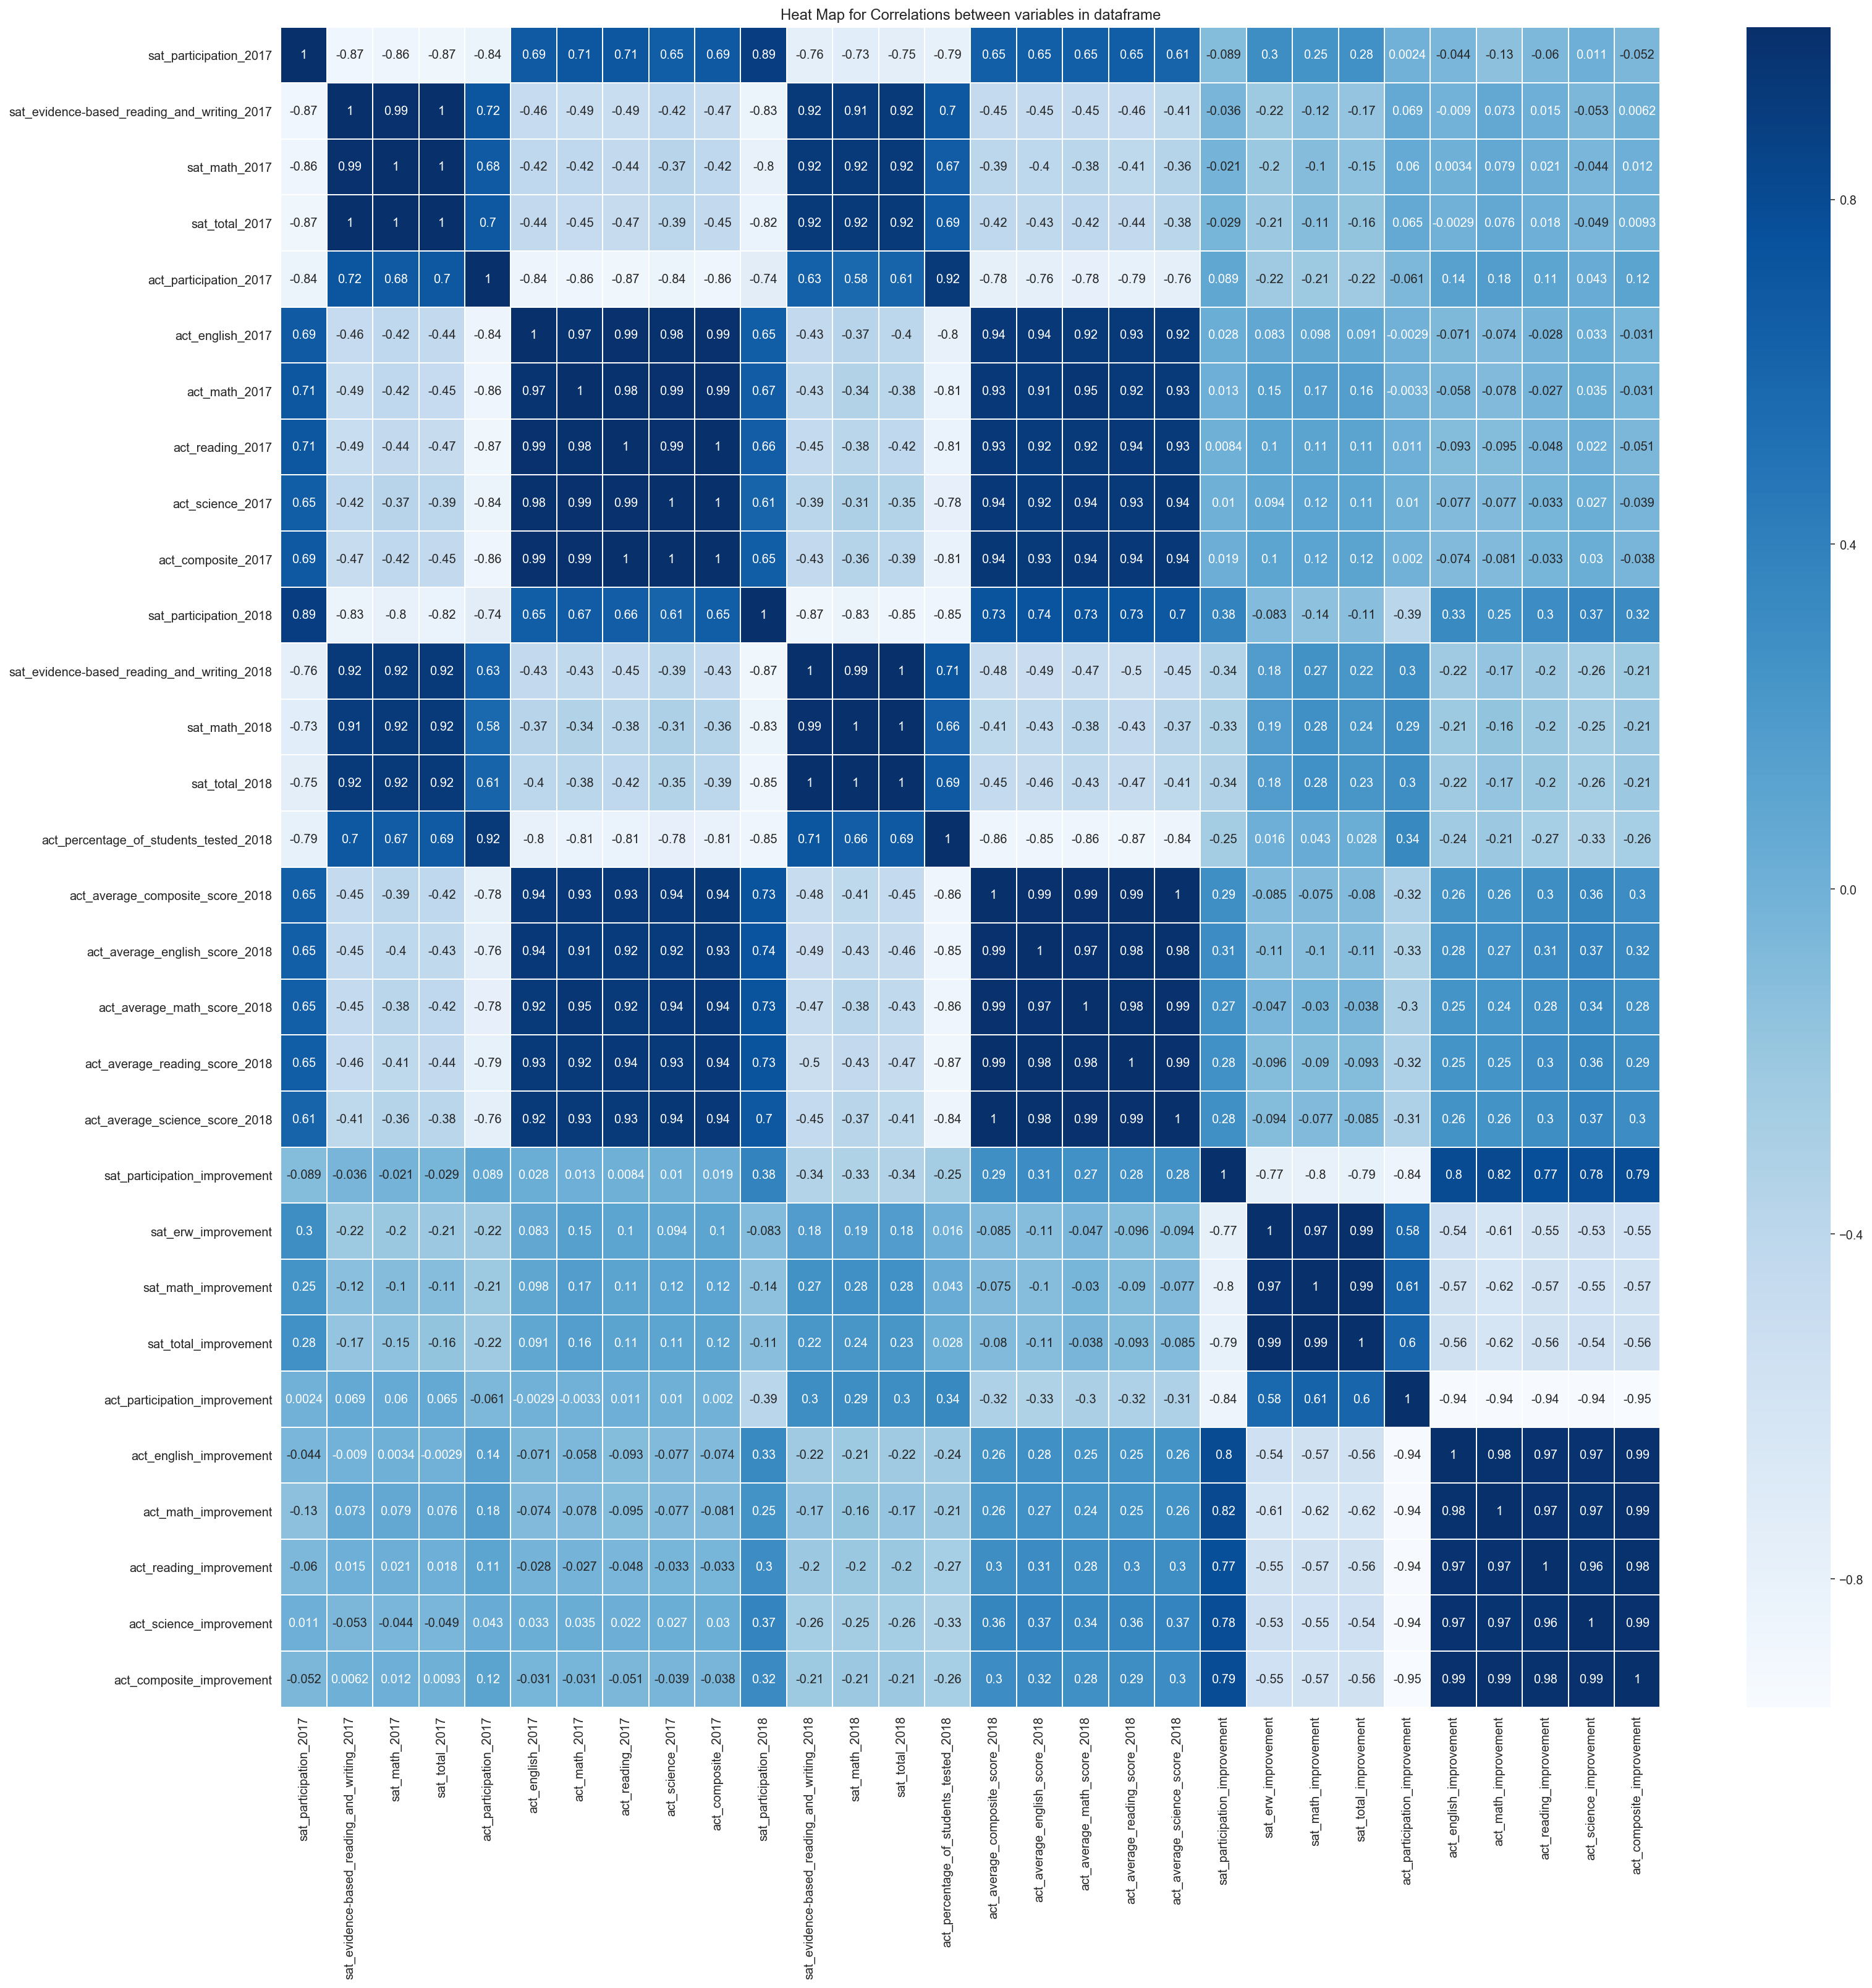

In [60]:
# Find correlations of variables in dataframe, then use seaborn heat map to plot.
correlations = df_sat_act_combined.corr()

# Set figure size to ensure it is large enough to display all variables in dataframe clearly.
plt.figure(figsize = (25,25))

# Set annot=True to include correlation values within each box for better understanding of plot.
ax = sns.heatmap(correlations,xticklabels=True, yticklabels=True, annot=True,linewidths=.5, cmap="Blues")

# Code to add space at top and bottom of heat map - default settings will cut off plot at top and bottom
bottom, top = ax.get_ylim()
ax.set_title('Heat Map for Correlations between variables in dataframe')
ax.set_ylim(bottom + 0.5, top - 0.5);

Based on the heatmap generated, the 'sat_partipation_improvement' variable is highly negatively correlated to the variable 'act_participation_improvement', with a correlation of -0.84. This suggests that states with increase in SAT participation rates likely had a corresponding decrease in ACT participation rates from 2017 to 2018.

The 'sat_participation_2017' variable is highly positively correlated to the 'sat_participation_2018' variable, with a correlation of 0.89. This suggests that states with high SAT participation rates in 2017 are likely to have high SAT participation rates in 2018 as well.

The SAT participation rates are negatively correlated to the SAT subject and total scores, and positively correlated to the ACT subject and composite scores, for 2017 and 2018.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [61]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles=0, list_of_xlabels=0):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(8,5),sharey=True) # You'll want to specify your figsize
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

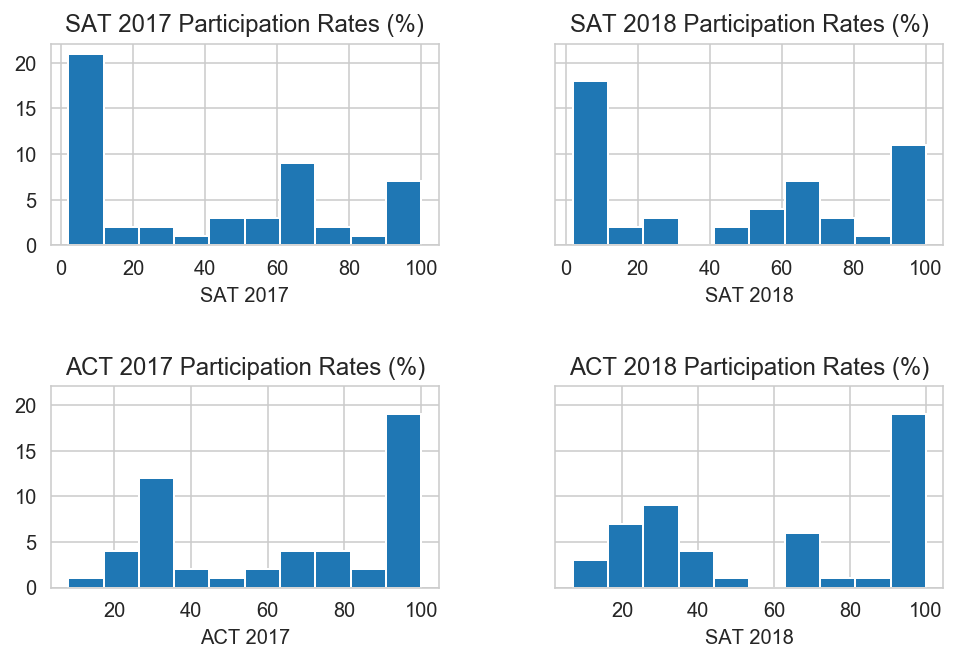

In [62]:
# Histogram subplots of SAT and ACT participation rates for 2017 and 2018
list_of_titles = ['SAT 2017 Participation Rates (%)','SAT 2018 Participation Rates (%)',
                  'ACT 2017 Participation Rates (%)','ACT 2018 Participation Rates (%)']
list_of_xlabels = ['SAT 2017','SAT 2018','ACT 2017','SAT 2018']
list_of_columns = ['sat_participation_2017','sat_participation_2018',
                    'act_participation_2017','act_percentage_of_students_tested_2018']
subplot_histograms(df_sat_act_combined, list_of_columns, list_of_titles,list_of_xlabels)

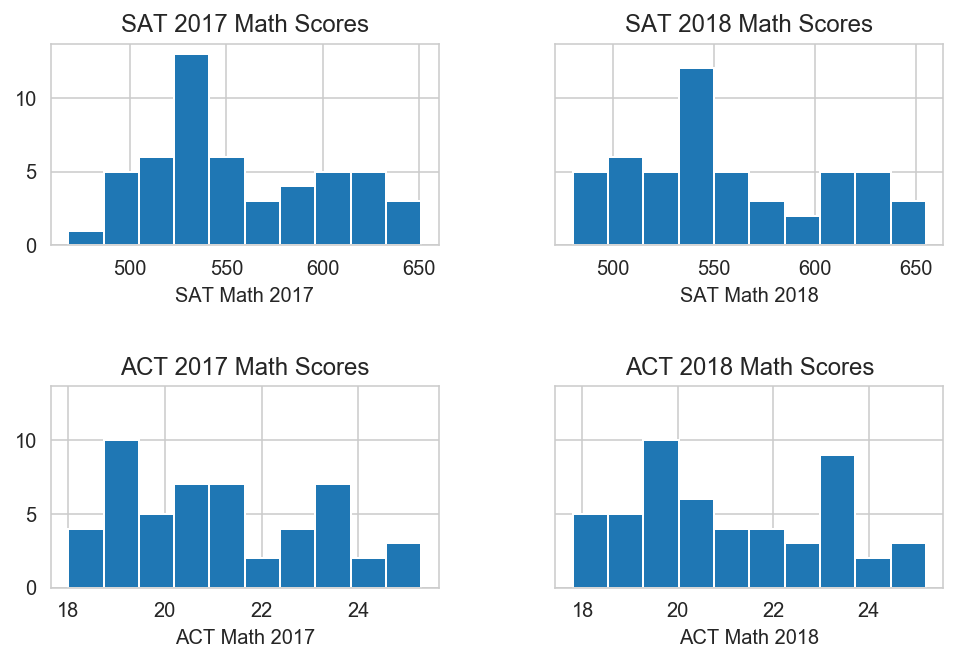

In [63]:
list_of_titles = ['SAT 2017 Math Scores','SAT 2018 Math Scores',
                  'ACT 2017 Math Scores','ACT 2018 Math Scores']
list_of_xlabels = ['SAT Math 2017','SAT Math 2018','ACT Math 2017','ACT Math 2018']
list_of_columns = ['sat_math_2017','sat_math_2018','act_math_2017','act_average_math_score_2018']
subplot_histograms(df_sat_act_combined, list_of_columns, list_of_titles,list_of_xlabels)

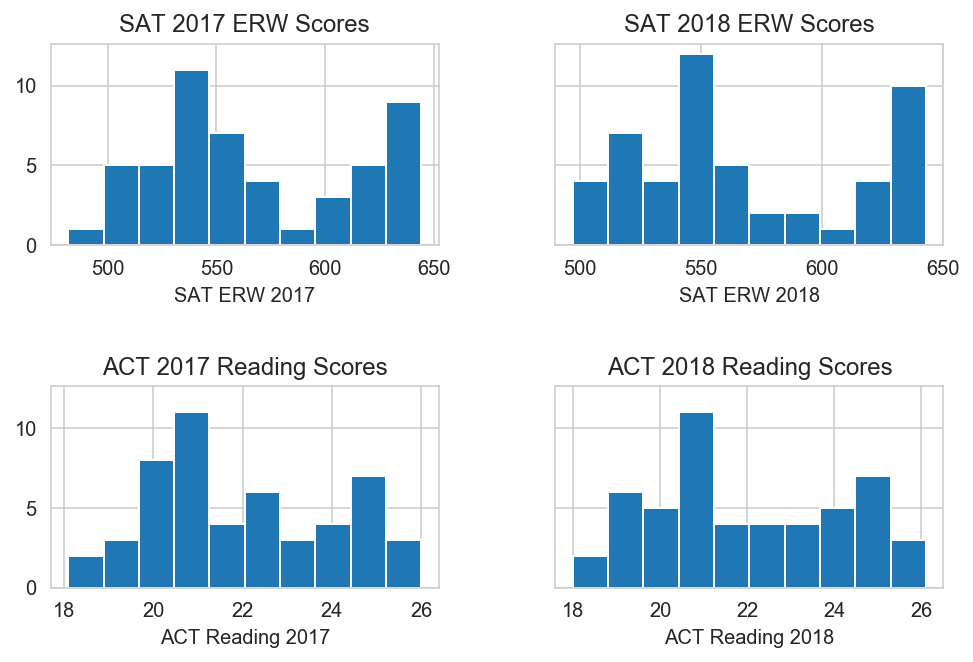

In [64]:
list_of_titles = ['SAT 2017 ERW Scores','SAT 2018 ERW Scores',
                  'ACT 2017 Reading Scores','ACT 2018 Reading Scores']
list_of_xlabels = ['SAT ERW 2017','SAT ERW 2018','ACT Reading 2017','ACT Reading 2018']
list_of_columns = ['sat_evidence-based_reading_and_writing_2017','sat_evidence-based_reading_and_writing_2018',
                   'act_reading_2017','act_average_reading_score_2018']
subplot_histograms(df_sat_act_combined, list_of_columns, list_of_titles,list_of_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


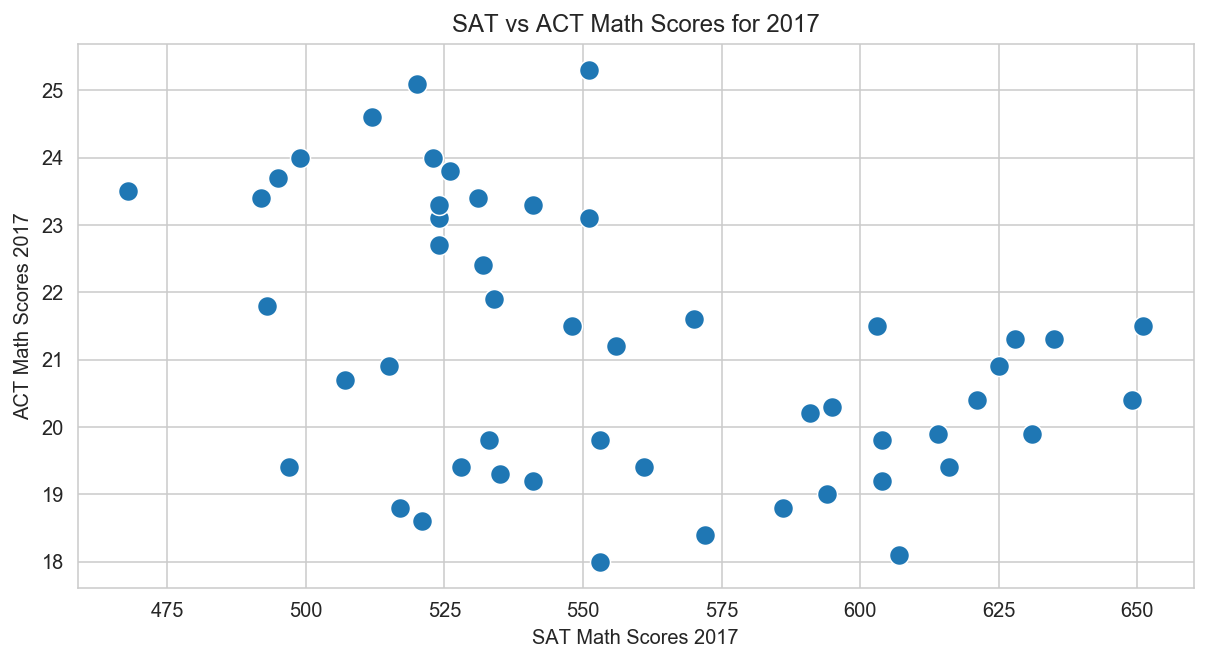

In [65]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_math_2017', y='act_math_2017', data=df_sat_act_combined, s=100)
plt.title('SAT vs ACT Math Scores for 2017')
plt.xlabel('SAT Math Scores 2017');
plt.ylabel('ACT Math Scores 2017');

There is a negative correlation (-0.42), which suggests that states which had better SAT math scores were likely to have lower ACT math scores.

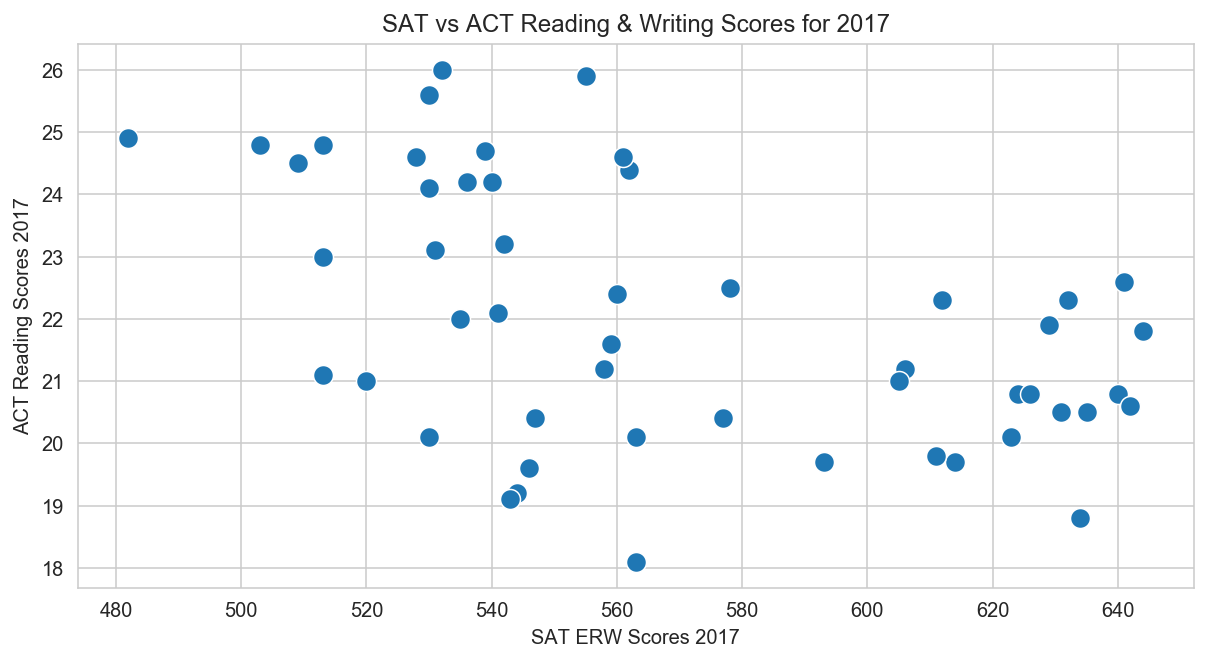

In [66]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_evidence-based_reading_and_writing_2017', y='act_reading_2017', data=df_sat_act_combined, s=100)
plt.title('SAT vs ACT Reading & Writing Scores for 2017')
plt.xlabel('SAT ERW Scores 2017');
plt.ylabel('ACT Reading Scores 2017');

There is a negative correlation (-0.49), which suggests that states which had better SAT reading/writing scores were likely to have lower ACT reading scores.

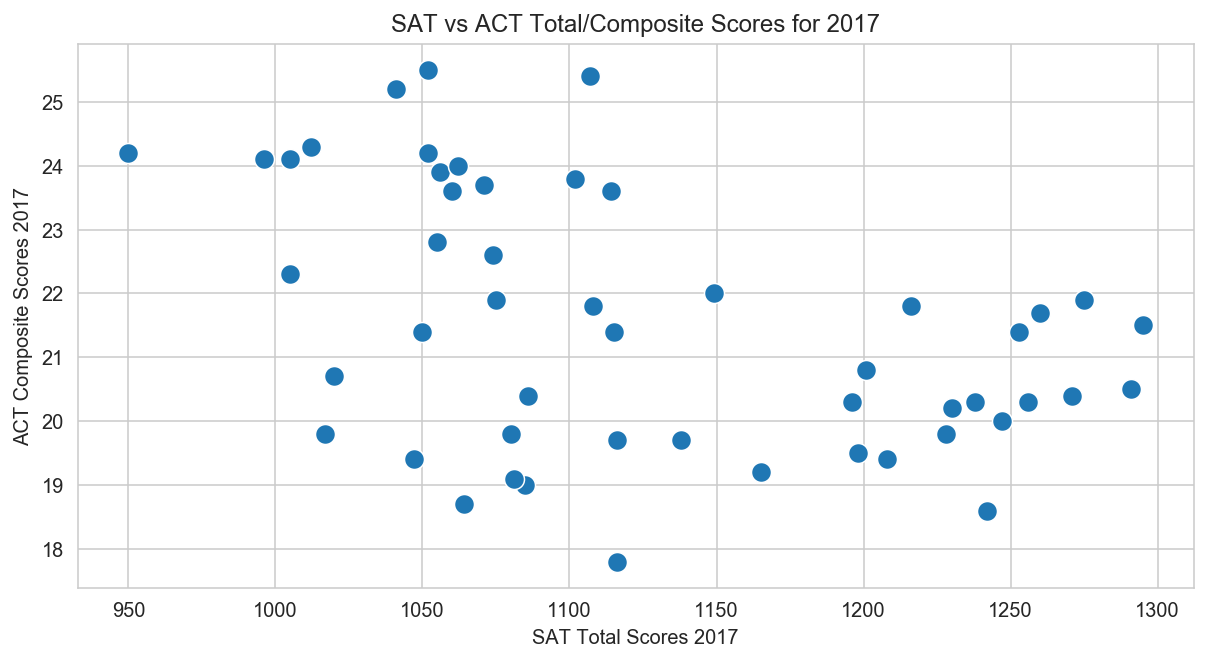

In [67]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_total_2017', y='act_composite_2017', data=df_sat_act_combined, s=100)
plt.title('SAT vs ACT Total/Composite Scores for 2017')
plt.xlabel('SAT Total Scores 2017');
plt.ylabel('ACT Composite Scores 2017');

There is a negative correlation (-0.45), which suggests that states which had better SAT total scores were likely to have lower ACT composite scores.

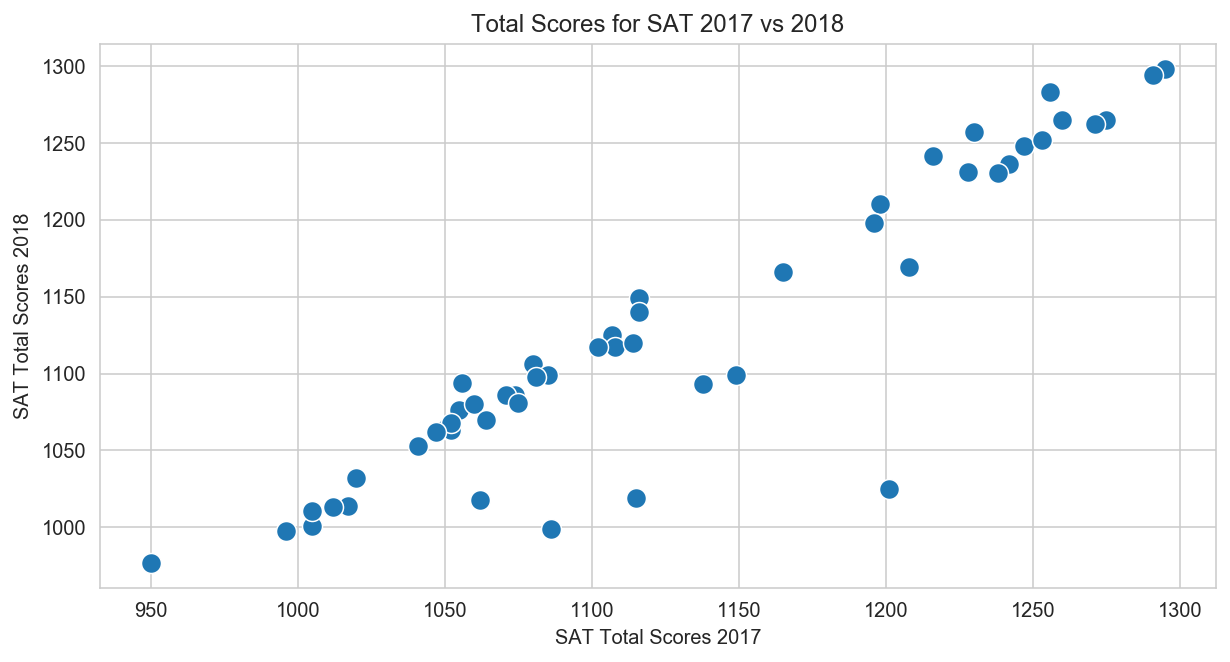

In [68]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_total_2017', y='sat_total_2018', data=df_sat_act_combined, s=100)
plt.title('Total Scores for SAT 2017 vs 2018')
plt.xlabel('SAT Total Scores 2017');
plt.ylabel('SAT Total Scores 2018');

There is a strong positive correlation (0.92), which suggests that states with high SAT total scores in 2017 are likely to have high SAT total scores in 2018 as well.

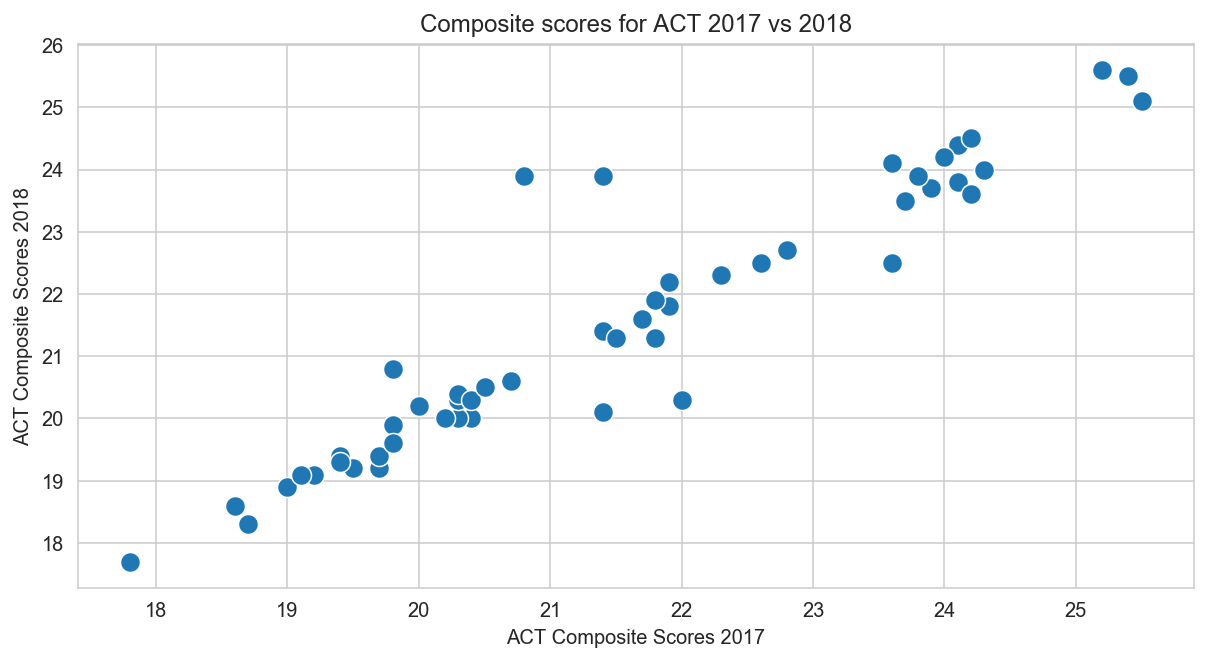

In [69]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='act_composite_2017', y='act_average_composite_score_2018', data=df_sat_act_combined, s=100)
plt.title('Composite scores for ACT 2017 vs 2018')
plt.xlabel('ACT Composite Scores 2017');
plt.ylabel('ACT Composite Scores 2018');

There is a strong positive correlation (0.94), which suggests that states with high ACT composite scores in 2017 are likely to have high ACT composite scores in 2018 as well.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

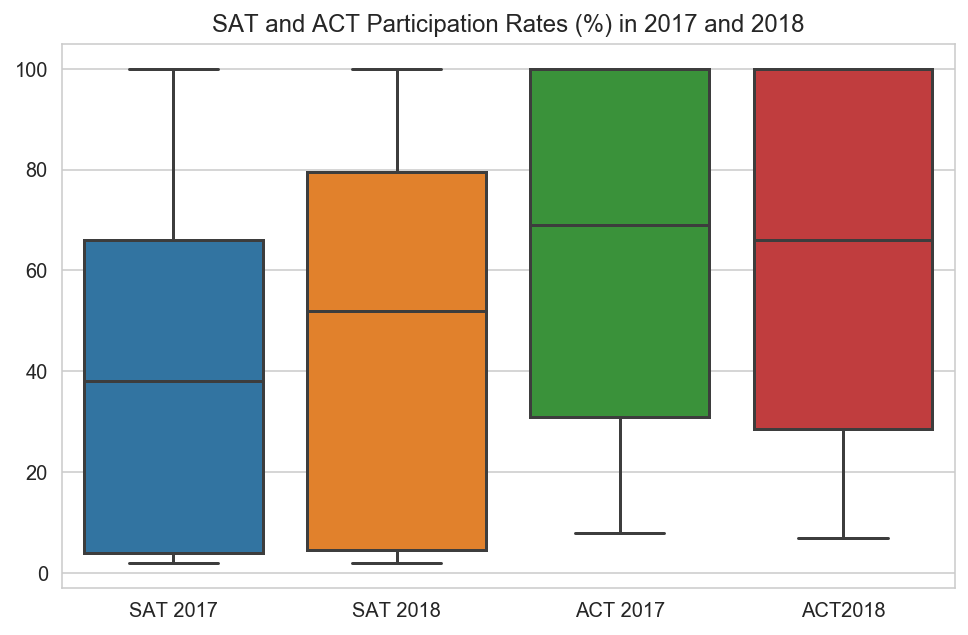

In [70]:
# Plot SAT and ACT participation rates on a single boxplot, since they are of the same relative scale (0-100%)
columns_participation = ['sat_participation_2017','sat_participation_2018',
                        'act_participation_2017','act_percentage_of_students_tested_2018']
data_participation = df_sat_act_combined[columns_participation]
new_columns_list = ['SAT 2017','SAT 2018','ACT 2017','ACT2018']
data_participation.columns = new_columns_list

plt.figure(figsize = (8,5))
sns.boxplot(data=data_participation).set_title('SAT and ACT Participation Rates (%) in 2017 and 2018');

Overall, the ACT participation rates are generally higher than the SAT participation rates for 2017 and 2018.

For SAT, the values in the IQR are close to the minimum value, which suggests that the bottom 25% of the states have similar participation rates.

For ACT, the values in the IQR are close to the maximum value, which suggests that the top 25% of the states have similar participation rates.

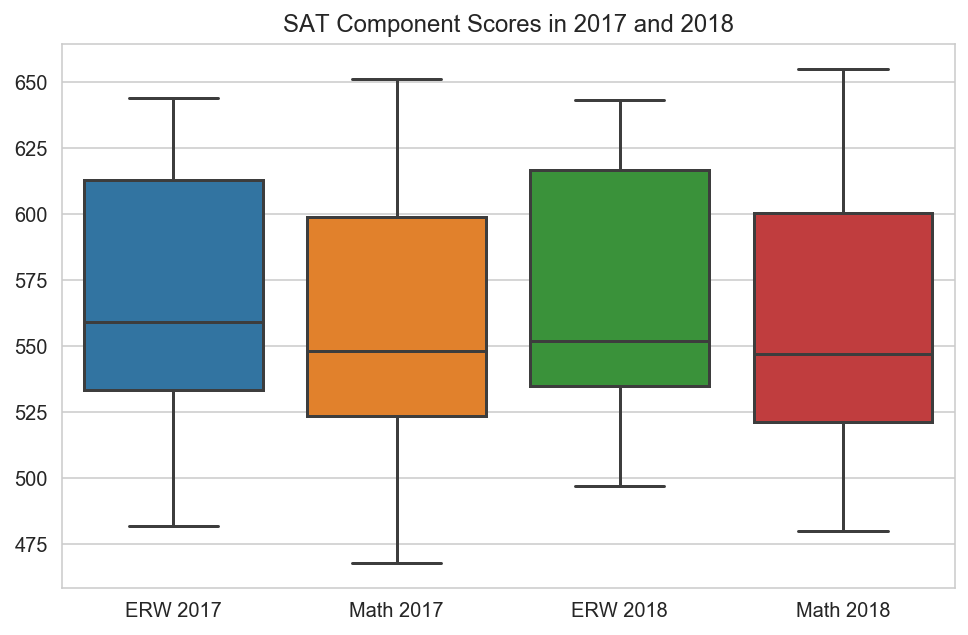

In [71]:
# Plot SAT component scores for 2017 and 2018 on a single boxplot, since they are of the same relative scale (0-800)
columns_SAT_ComponentScores = ['sat_evidence-based_reading_and_writing_2017','sat_math_2017',
                        'sat_evidence-based_reading_and_writing_2018','sat_math_2018']
data_SAT_ComponentScores = df_sat_act_combined[columns_SAT_ComponentScores]
new_columns_list = ['ERW 2017','Math 2017','ERW 2018','Math 2018']
data_SAT_ComponentScores.columns = new_columns_list

plt.figure(figsize = (8,5))
sns.boxplot(data=data_SAT_ComponentScores).set_title('SAT Component Scores in 2017 and 2018');

Overall, the median values for each test are close to the 25%, which suggests that states in the 25-50th percentile have similar scores, as compared to states in the 50th to 75% percentile.

The SAT math scores for both 2017 and 2018 seem to be slightly lower than the ERW scores. 

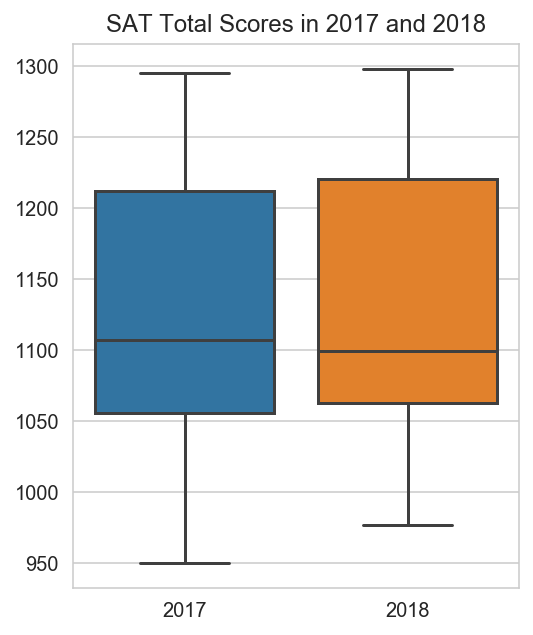

In [72]:
# Plot SAT total scores for 2017 and 2018 on a single boxplot, since they are of the same relative scale (0-1600)
columns_SAT_TotalScores = ['sat_total_2017', 'sat_total_2018']
data_SAT_TotalScores = df_sat_act_combined[columns_SAT_TotalScores]
new_columns_list = ['2017','2018']
data_SAT_TotalScores.columns = new_columns_list

plt.figure(figsize = (4,5))
sns.boxplot(data=data_SAT_TotalScores).set_title('SAT Total Scores in 2017 and 2018');

In 2018, both the minimum and maximum total SAT scores improved as compared to 2017.

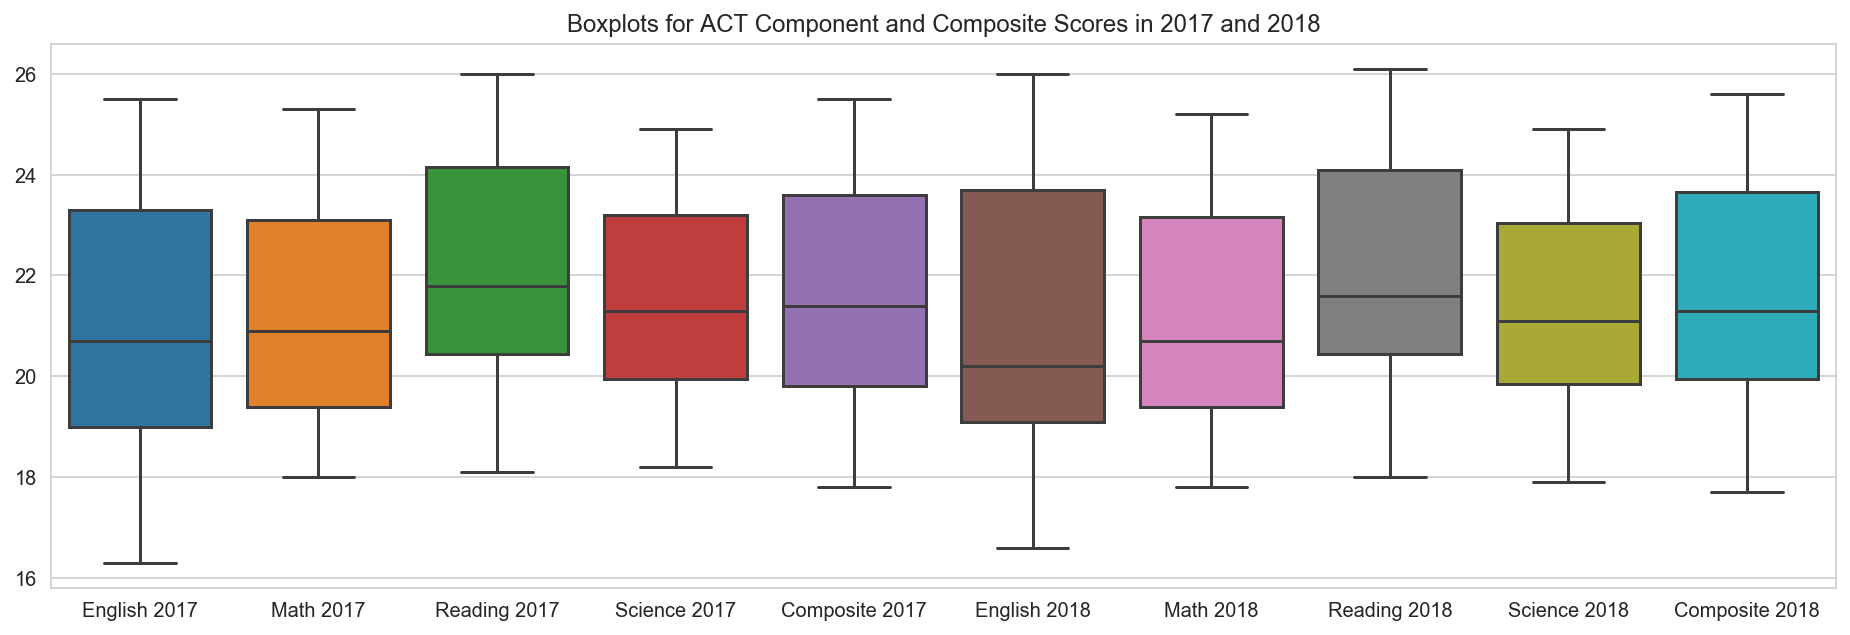

In [73]:
# Plot ACT component and composite scores for 2017 and 2018 on a single boxplot, 
# since they are of the same relative scale (1-36)
columns_ACT_Scores = ['act_english_2017','act_math_2017','act_reading_2017', 'act_science_2017','act_composite_2017',
                    'act_average_english_score_2018','act_average_math_score_2018','act_average_reading_score_2018', 
                    'act_average_science_score_2018','act_average_composite_score_2018']
data_ACT_Scores = df_sat_act_combined[columns_ACT_Scores]
new_columns_list = ['English 2017','Math 2017','Reading 2017', 'Science 2017','Composite 2017', 
                         'English 2018','Math 2018','Reading 2018', 'Science 2018','Composite 2018']
data_ACT_Scores.columns = new_columns_list

plt.figure(figsize = (16,5))
sns.boxplot(data=data_ACT_Scores).set_title('Boxplots for ACT Component and Composite Scores in 2017 and 2018');

The boxplots for each component/composite ACT tests have similar characteristics in both 2017 and 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

**Further analyse relationships and correlations between variables using scatterplots:**

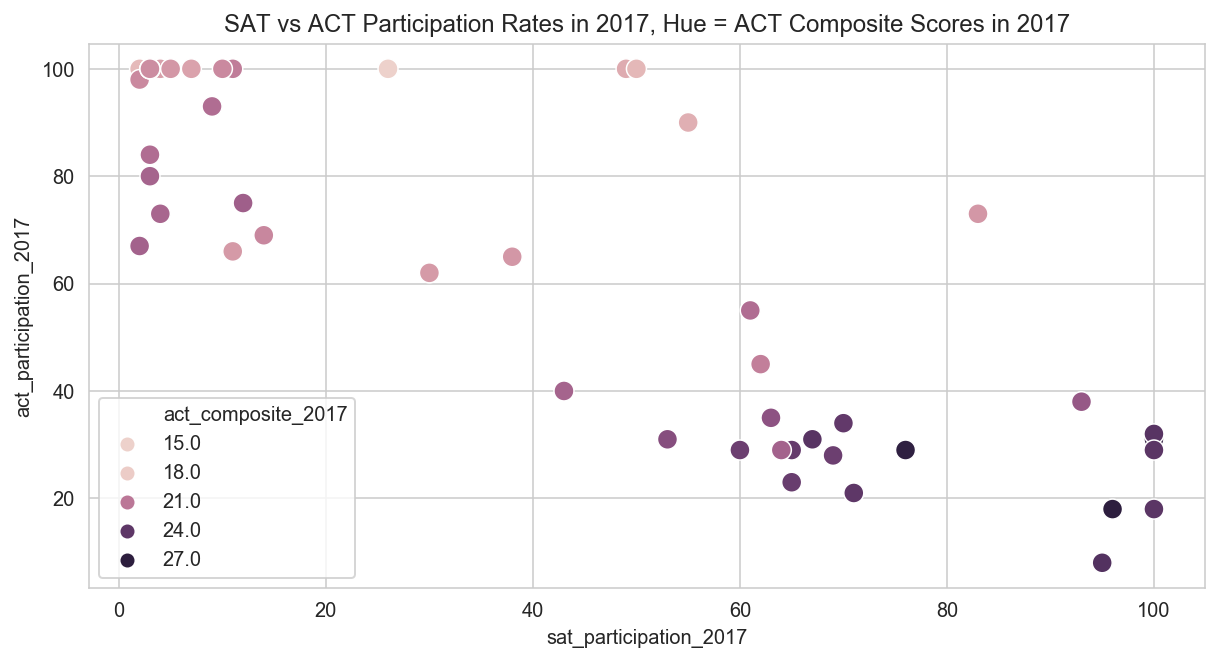

In [74]:
# Plot scatterplot of SAT vs ACT participation rates in 2017, with the hue representing the ACT composite scores.
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_participation_2017', y='act_participation_2017', hue='act_composite_2017', 
                data=df_sat_act_combined, 
                s=100).set_title('SAT vs ACT Participation Rates in 2017, Hue = ACT Composite Scores in 2017');

There is a negative correlation between the SAT and ACT participation rates in 2017, which suggests that states with high SAT participation rates are likely to have low ACT participation rates, and vice versa. 

There is also a negative correlation between the ACT participation rates and the ACT composite scores in 2017, which suggests that states with high ACT participation rates are likely to have low ACT composite scores, and vice versa.

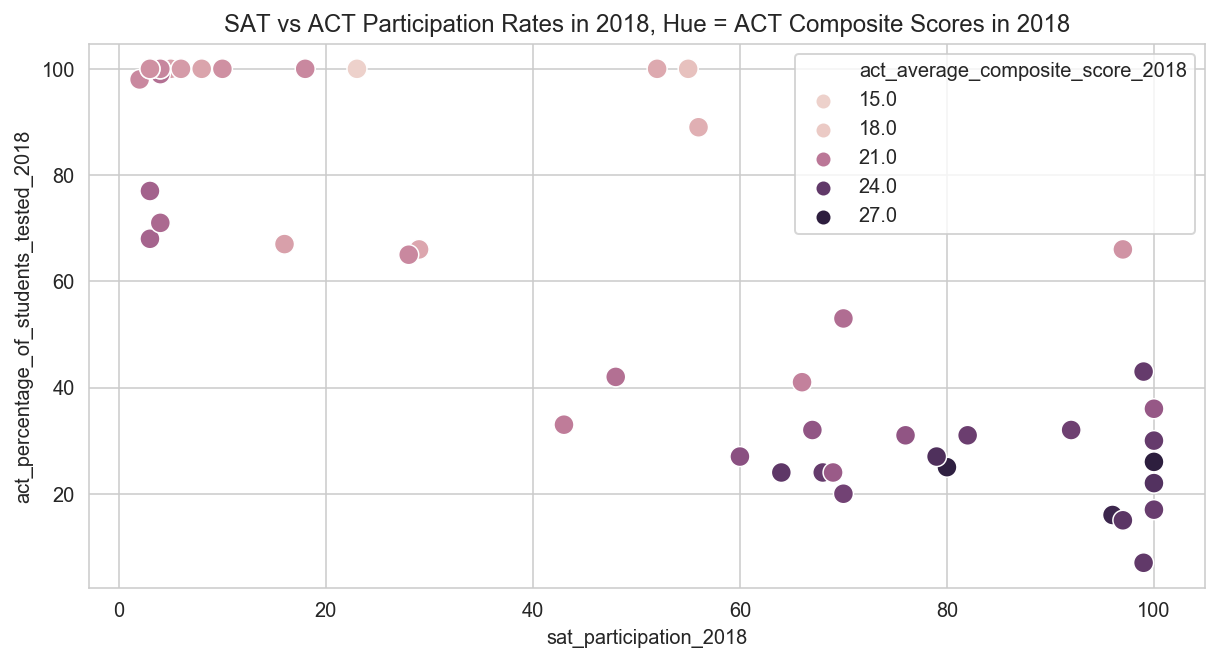

In [75]:
# Plot scatterplot of SAT vs ACT participation rates in 2018, with the hue representing the ACT composite scores.
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_participation_2018', y='act_percentage_of_students_tested_2018', 
                hue='act_average_composite_score_2018', data=df_sat_act_combined, 
                s=100).set_title('SAT vs ACT Participation Rates in 2018, Hue = ACT Composite Scores in 2018');

Similar to the data distribution for the 2017 plot, there are negative correlations between the SAT and ACT participation rates in 2018, as well as between the ACT participation rates and ACT composite scores in 2018.

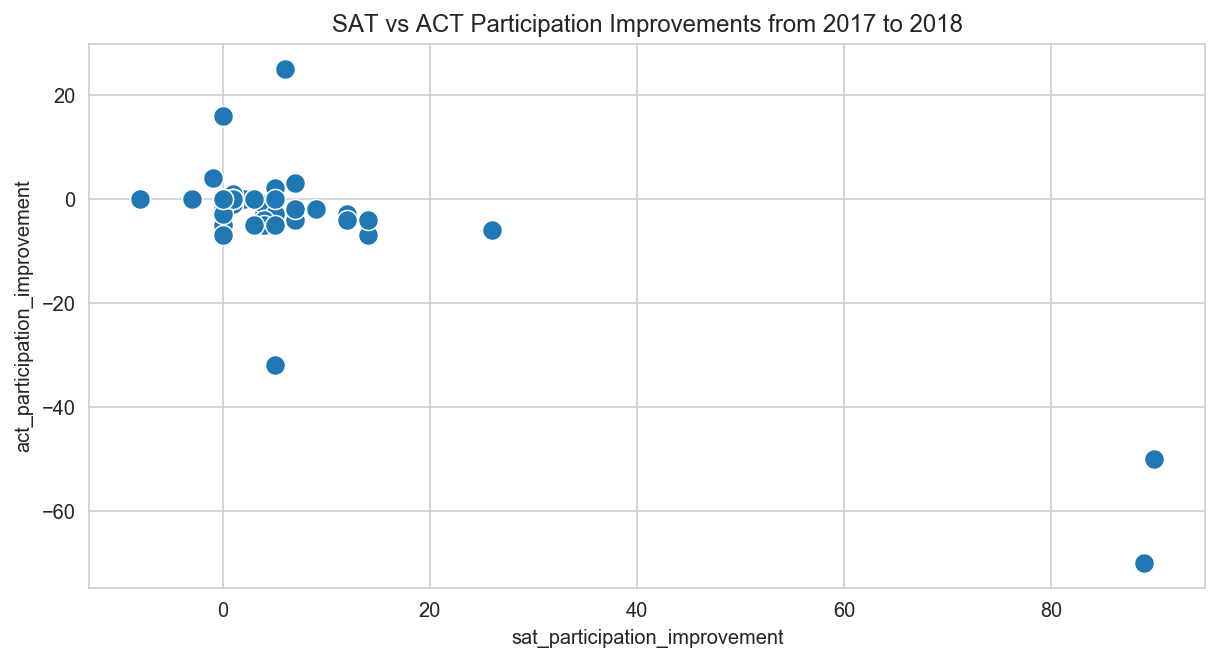

In [76]:
# Plot scatterplot of SAT vs ACT participation improvement from 2017 to 2018
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_participation_improvement', y='act_participation_improvement', data=df_sat_act_combined, 
                s=100).set_title('SAT vs ACT Participation Improvements from 2017 to 2018');

The scatterplot gives more details on how the SAT and ACT participation improvements are negatively correlated.

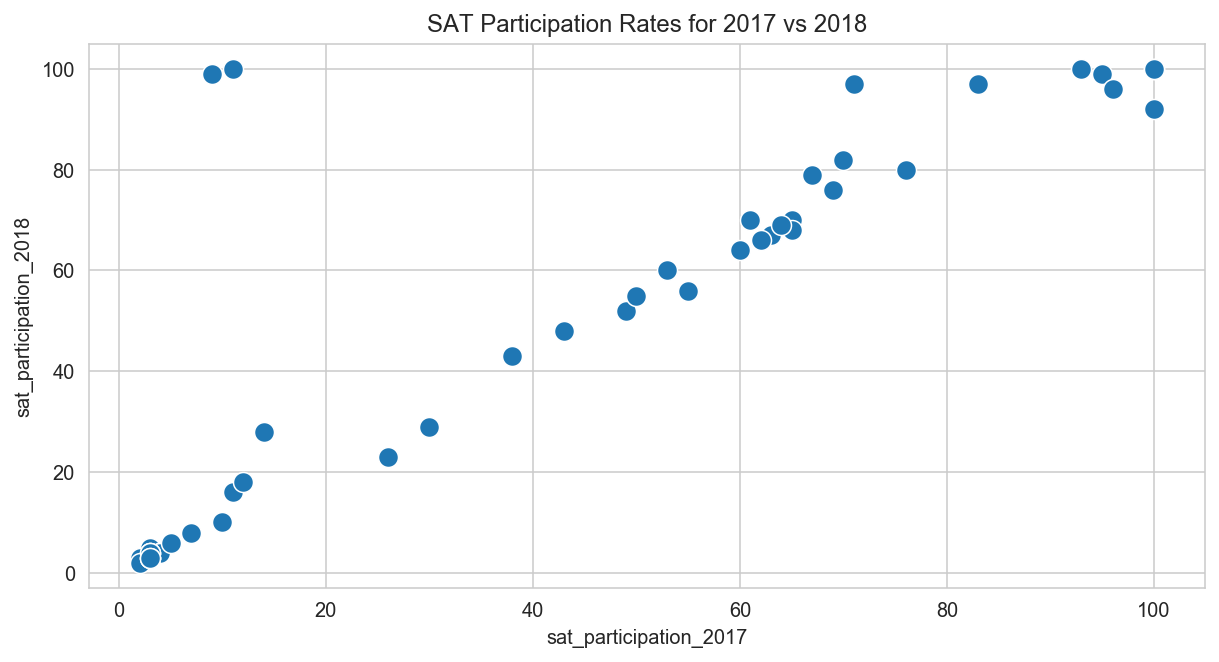

In [77]:
# Plot scatterplot of 2017 SAT participation rates vs 2018 SAT participation rates
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_participation_2017', y='sat_participation_2018', data=df_sat_act_combined, 
                s=100).set_title('SAT Participation Rates for 2017 vs 2018');

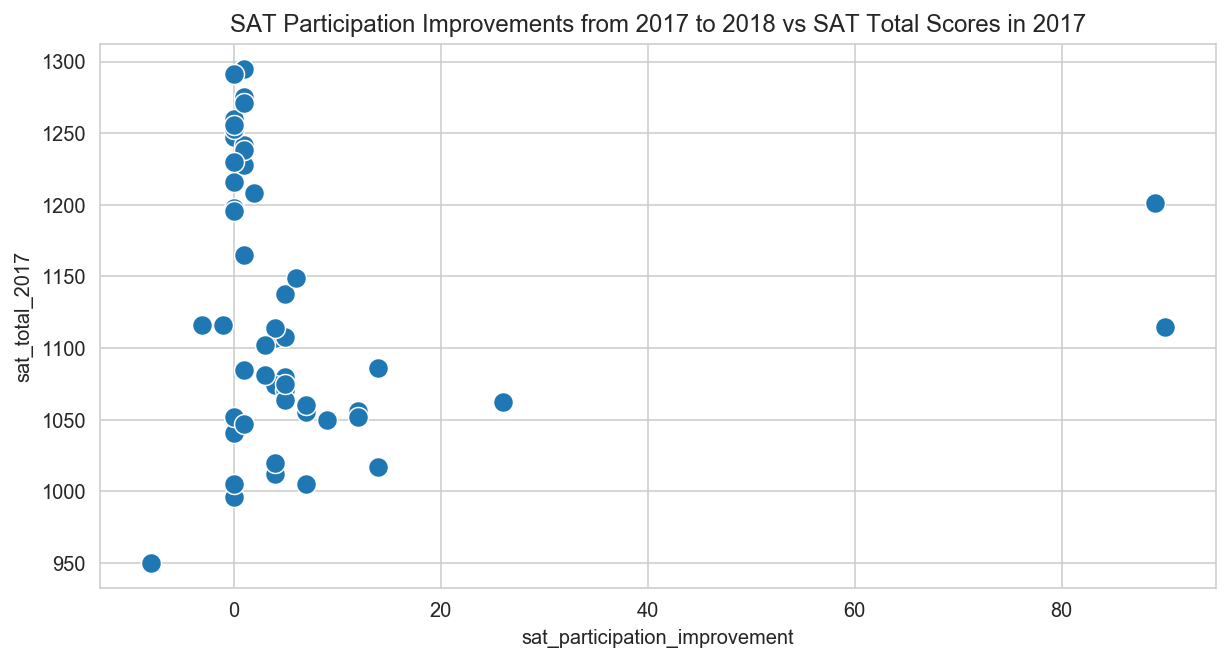

In [78]:
# Plot scatterplot of SAT participation improvements from 2017 to 2018 vs SAT total scores in 2017
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_participation_improvement', y='sat_total_2017', data=df_sat_act_combined, 
                s=100).set_title('SAT Participation Improvements from 2017 to 2018 vs SAT Total Scores in 2017');

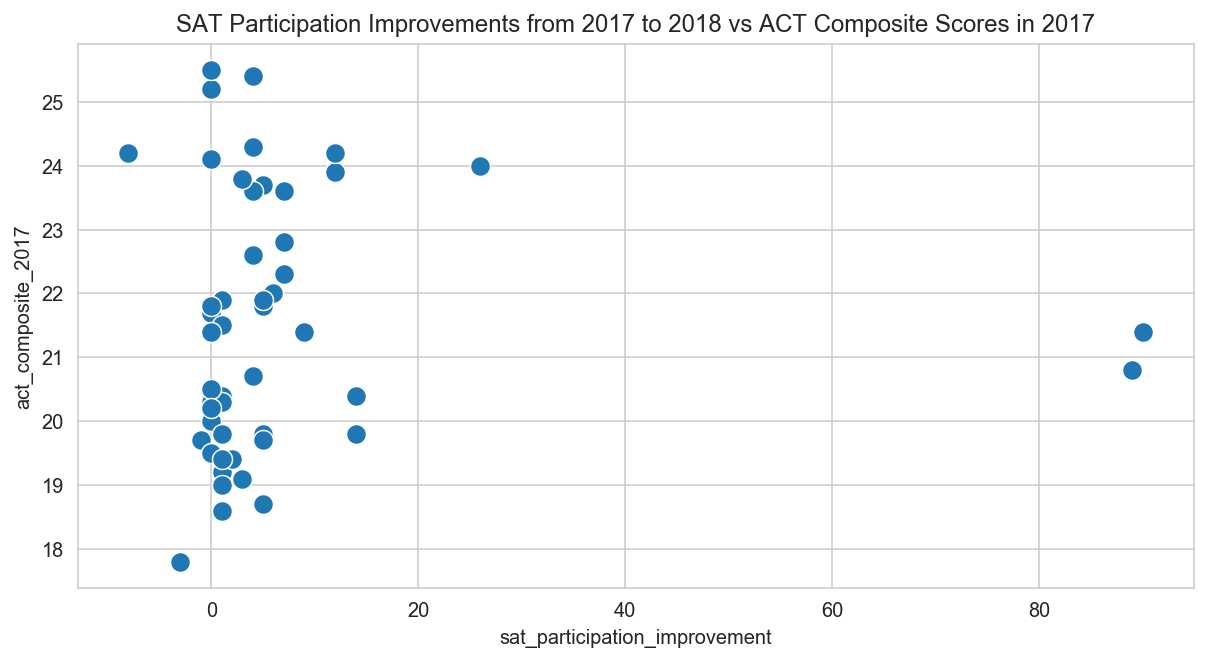

In [79]:
# Plot scatterplot of SAT participation improvements from 2017 to 2018 vs ACT composite scores in 2017
plt.figure(figsize = (10,5))
sns.scatterplot(x='sat_participation_improvement', y='act_composite_2017', data=df_sat_act_combined, 
                s=100).set_title('SAT Participation Improvements from 2017 to 2018 vs ACT Composite Scores in 2017');

There are no clear correlations between the SAT participation improvements and the SAT total scores or ACT composite scores in 2017. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

1. **sat_participation_2017**: Mean = 39.8, Std = 35.3, Min = 2, 25% = 4, 50% = 38, 75% = 66, Max = 100. The data has a large spread, based on the high standard deviation with respect to the magnitude of the mean. The bottom 25% of states have participation rates between 2% to 4%. 


2. **sat_evidence-based_reading_and_writing_2017**: Mean = 569.1, Std = 45.7, Min = 482, 25% = 533.5, 50% = 559, 75% = 613, Max = 644. The distribution is slightly right-skewed, since the mean (569.1) is larger than the median (559). The data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


3. **sat_math_2017**: Mean = 556.9, Std = 47.1, Min = 468, 25% = 523.5, 50% = 548, 75% = 599, Max = 651. The distribution is slightly right-skewed, since the mean (556.9) is larger than the median (548). The data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


4. **sat_total_2017**: Mean = 1126.1, Std = 92.5, Min = 950, 25% = 1056, 50% = 1107, 75% = 1212, Max = 1295. This variable is the computed using the sum of the 'sat_evidence-based_reading_and_writing_2017' and 'sat_math_2017'. The distribution is similar to 'sat_evidence-based_reading_and_writing_2017' and 'sat_math_2017' as well.


5. **sat_participation_2018**: Mean = 46.6, Std = 38.0, Min = 2, 25% = 4.5, 50% = 52, 75% = 79.5, Max = 100. The data has a large spread, based on the high standard deviation with respect to the magnitude of the mean. As compared to 'sat_participation_2017', the mean is higher. However, the bottom 25% of states still have low participation rates, between 2% to 4.5%. 


6. **sat_evidence-based_reading_and_writing_2018**: Mean = 567.3, Std = 45.3, Min = 497, 25% = 535, 50% = 552, 75% = 616.5, Max = 643. The distribution is slightly right-skewed, since the mean (563.7) is larger than the median (552). The data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


7. **sat_math_2018**: Mean = 557.3, Std = 48.9, Min = 480, 25% = 521.5, 50% = 547, 75% = 600.5, Max = 655. The distribution is slightly right-skewed, since the mean (556.2) is larger than the median (544). The data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


8. **sat_total_2018**: Mean = 1124.7, Std = 93.9, Min = 977, 25% = 1062.5, 50% = 1099, 75% = 1220, Max = 1298. This variable is the computed using the sum of the 'sat_evidence-based_reading_and_writing_2018' and 'sat_math_2018'. The distribution is similar to 'sat_evidence-based_reading_and_writing_2018' and 'sat_math_2018' as well.


9. **act_participation_2017**: Mean = 65.3, Std = 32.1, Min = 8, 25% = 31, 50% = 69, 75% = 100, Max = 100. The data has a large spread, given the high standard deviation with respect to the magnitude of the mean. The top 25% of states have 100% ACT participation rates in 2017.


10. **act_english_2017**: Mean = 20.9, Std = 2.4, Min = 16.3, 25% = 19, 50% = 20.7, 75% = 23.3, Max = 25.5. The value of the mean is close to the median, and the data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


11. **act_math_2017**: Mean = 21.2, Std = 2.0, Min = 18, 25% = 19.4, 50% = 20.9, 75% = 23.1, Max = 25.3. The value of the mean is close to the median, and the data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


12. **act_reading_2017**: Mean = 22.0, Std = 2.1, Min = 18.1, 25% = 20.5, 50% = 21.8, 75% = 24.2, Max = 26. The value of the mean is close to the median, and the data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


13. **act_science_2017**: Mean = 21.5, Std = 1.7, Min = 18.2, 25% = 20, 50% = 21.3, 75% = 23.2, Max = 24.9. The value of the mean is close to the median, and the data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


14. **act_composite_2017**: Mean = 21.5, Std = 2.0, Min = 17.8, 25% = 19.8, 50% = 21.4, 75% = 23.6, Max = 25.5. This variable is the computed using the sum of the ACT english, math, reading and science scores. The distribution is similar to those as well.


15. **act_percentage_of_students_tested_2018**: Mean = 61.6, Std = 34.1, Min = 7, 25% = 28.5, 50% = 66, 75% = 100, Max = 100. The data has a large spread, given the high standard deviation with respect to the magnitude of the mean. The top 25% of states have 100% ACT participation rates in 2017.


16. **act_average_english_score_2018**: Mean = 21.0, Std = 2.4, Min = 16.6, 25% = 19.1, 50% = 20.2, 75% = 23.7, Max = 26. The value of the mean is close to the median, and the data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


17. **act_average_math_score_2018**: Mean = 21.2, Std = 2.0, Min = 17.8, 25% = 19.4, 50% = 20.7, 75% = 23.2, Max = 25.2. The value of the mean is close to the median, and the data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


18. **act_average_reading_score_2018**: Mean = 22.0, Std = 2.2, Min = 18, 25% = 20.5, 50% = 21.6, 75% = 24.1, Max = 26.1. The value of the mean is close to the median, and the data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


19. **act_average_science_score_2018**: Mean = 21.3, Std = 1.9, Min = 17.9, 25% = 19.9, 50% = 21.1, 75% = 23.1, Max = 24.9. The value of the mean is close to the median, and the data has a small spread, since the standard deviation is low with respect to the magnitude of the mean.


20. **act_average_composite_score_2018**: Mean = 21.5, Std = 2.1, Min = 17.7, 25% = 20.0, 50% = 21.3, 75% = 23.7, Max = 25.6. This variable is the computed using the sum of the ACT english, math, reading and science scores. The distribution is similar to those as well.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

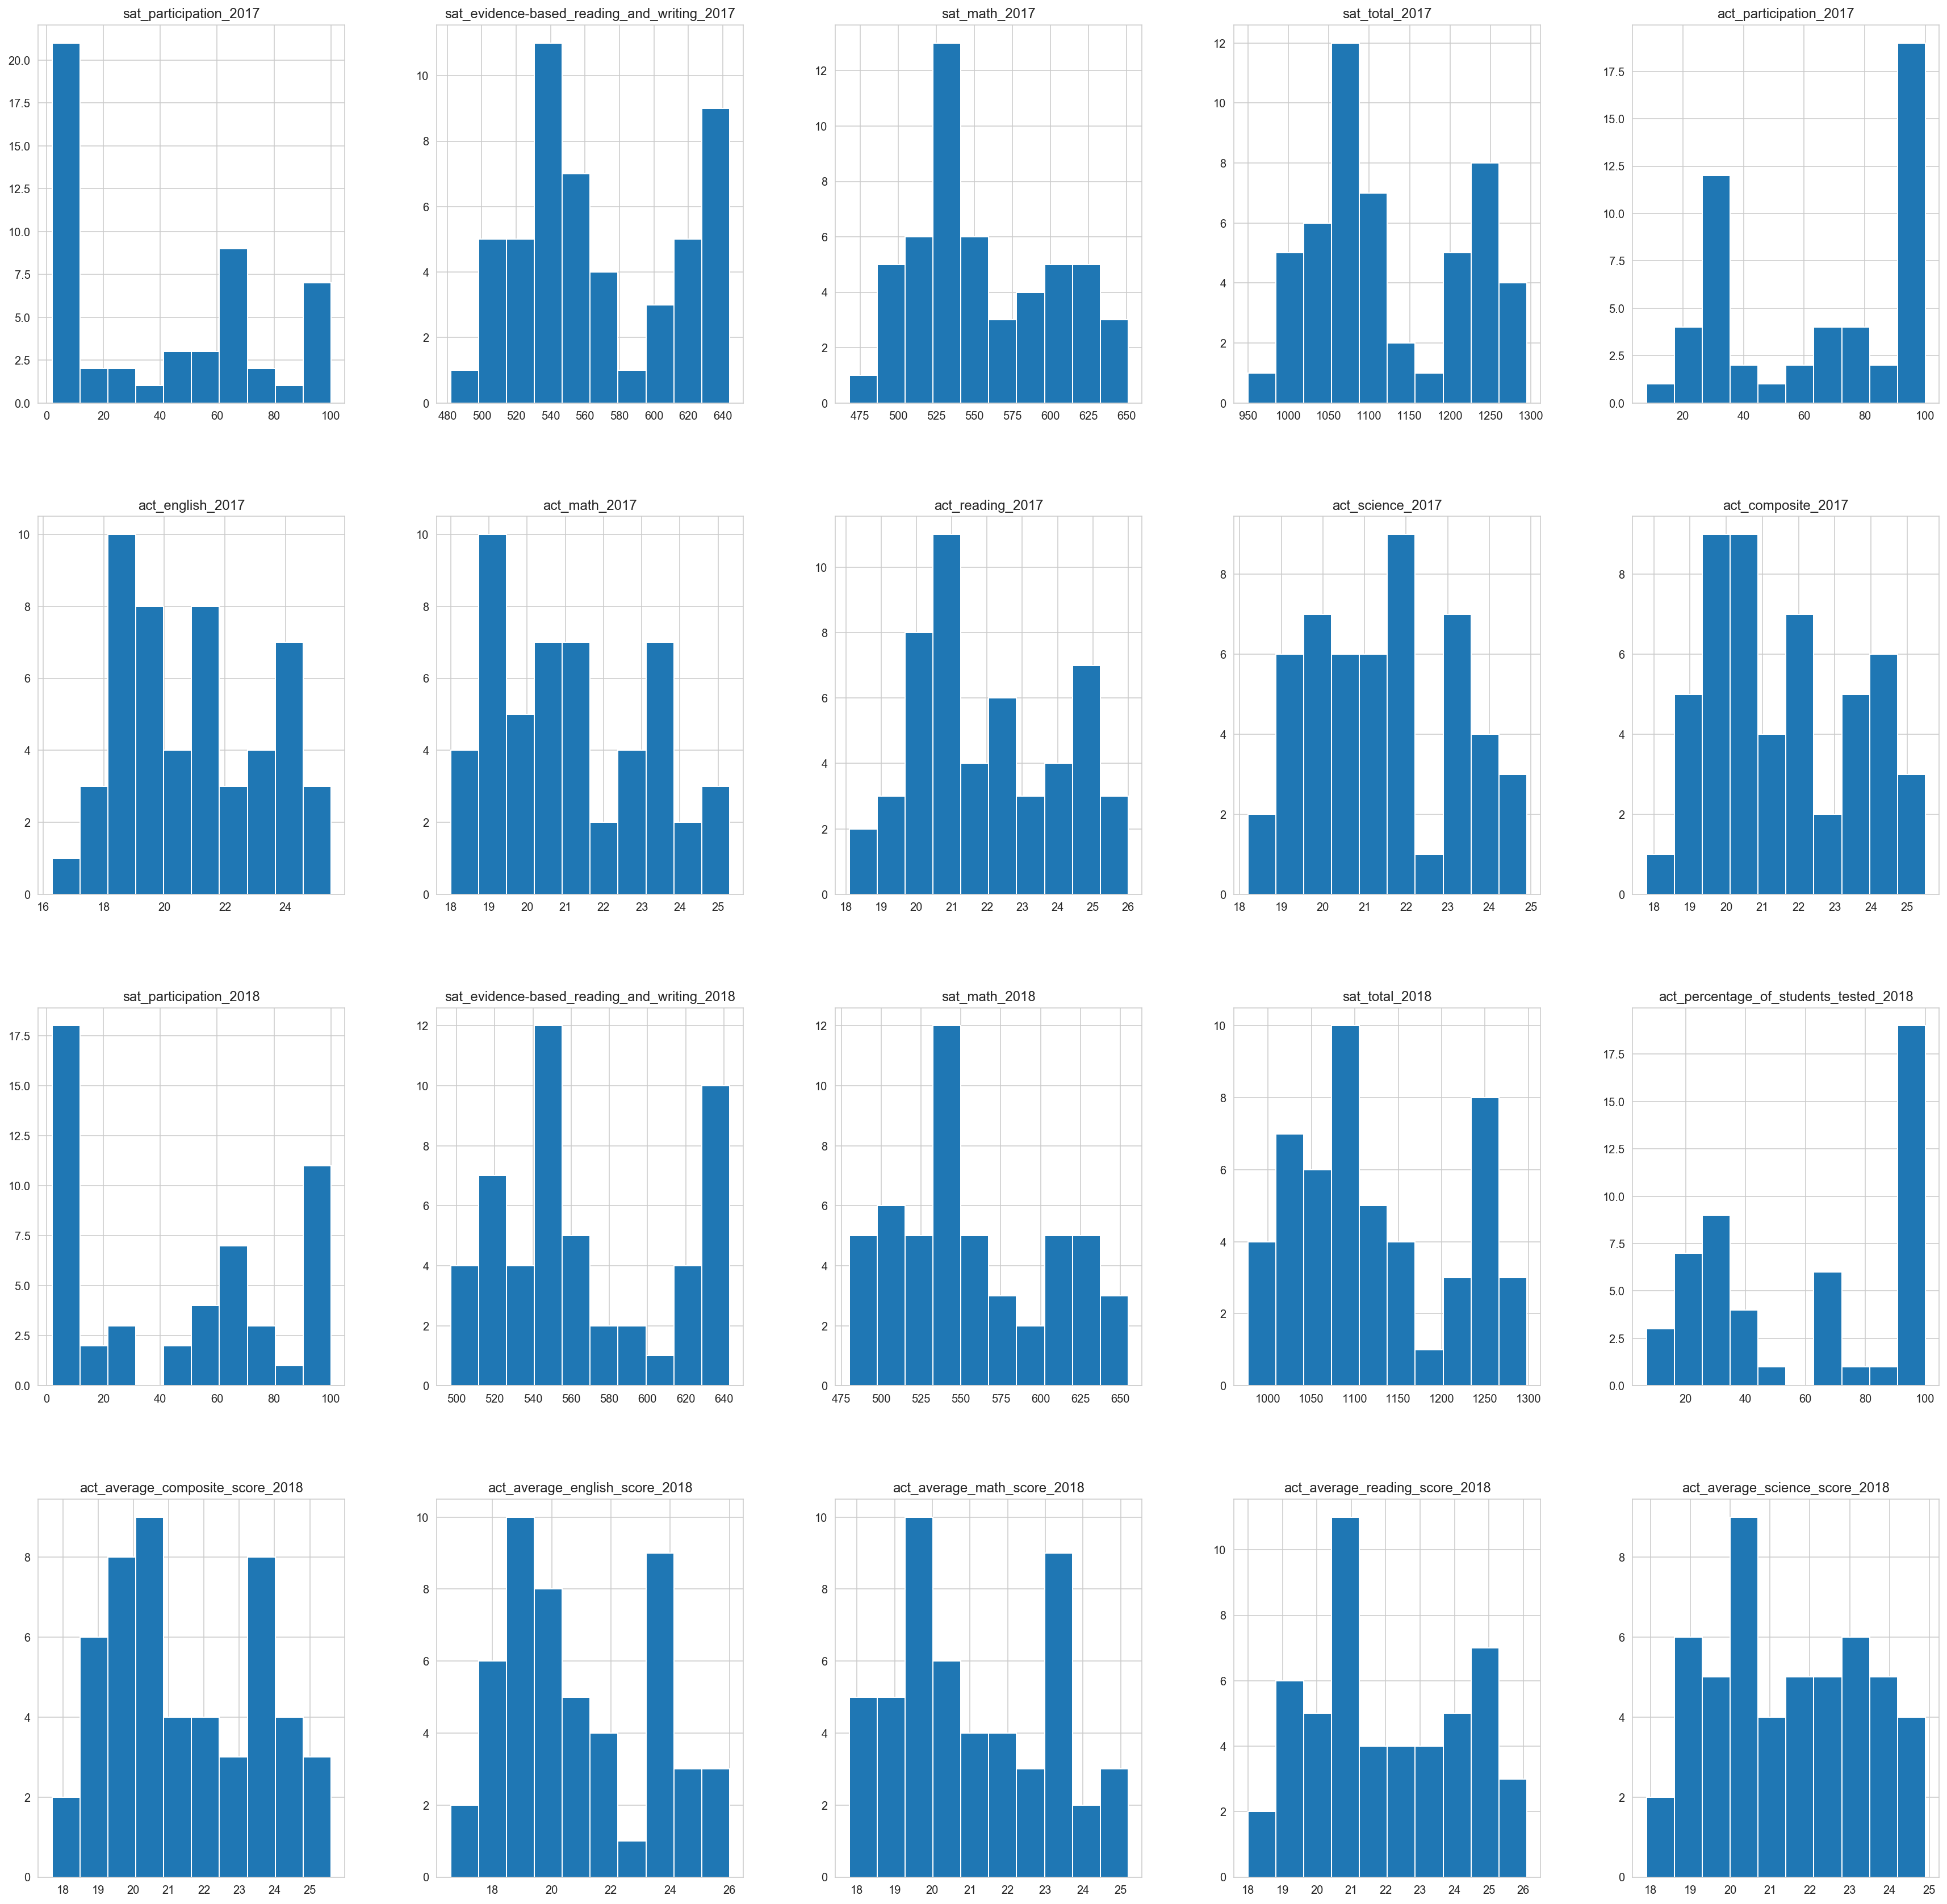

In [80]:
def subplot_histograms_all(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/5)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=5,figsize=(30,30)) 
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i])

df_sat_act_combined_plot = df_sat_act_combined.iloc[:,:20]
subplot_histograms_all(df_sat_act_combined_plot, df_sat_act_combined_plot.columns, df_sat_act_combined_plot.columns)

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: No, the distributions are not normal.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: 

We cannot conduct statistical inference as the data is not normal (it will not make much sense)
The aggregation of data (Mean computation and standard deviation of the distribution) might not give valuable insights to the data because most of the data may not be spread around mean.

Aggregation of values will also be biased due to the differences in population size within each state. 
For example, when calculating the mean of a particular variable e.g. 'sat_participation_2017', we use the formula sum(all rows)/numOfStates for that particular column. However, this does not take into account the fact that some states are much larger in population than others, which means that the mean of the states' 'sat_participation_2017' is likely not the same as the actual population mean.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: It is not appropriate to compare them directly, since the SAT and ACT math scores are on different scales. To compare directly, the scores should be normalised first.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

In 2018, the SAT overtook the ACT to reclaim its long-held position as the nation's most widely used college admission test. Based on research, the following reasons have been identified for the switch from the ACT to the SAT, as the College Board, which owns the SAT, pushed to expand its market share:

1. **Revision of SAT in 2016** to remove "tricky vocabulary" as well as the "guessing penalty", a feature that deducted points for wrong answers.This made the SAT "more straightforward and approachable", as compared to the older version that was seen "narrowly as a test for advanced kids."


2. **Entering contracts with numerous states and school systems** (e.g. Colorado, Illinois) for provision of the exam. For example, after years as an ACT state, in 2017, Illinois began providing the SAT tests for free to all juniors in public high schools. This largely increased the participation rates, from 9% in 2017 to 99% in 2018. On the other hand, the ACT participation rates decreased from 93% in 2017 to 43% in 2018. Illinois officials said they are finalizing a testing contract with the College Board that will cost $59.8 million over six years. SAT usage also spiked in Colorado because of a contract with the College Board. The SAT participation rates increased from 11% to 100%, while the ACT participation rates dropped from 100% to 30%.

    a) The assessment landscape remains fluid because when contract expire, states regularly asks for bids, and business can switch.
    
    b) Currently, what tests students took largely depended on where they lived - the SAT is strongest on the coasts and the ACT in the Midwest and South. In 2017, 16 states give the ACT free to students state-wide and another 4 fund ACT test-taking on a district-optional basis. In Winsconsin, the state's official high school test is now the ACT (100% participation rate), to motivate students because the results can go on their college applications. 


3. **Delivery of SAT on school days**

https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/
http://www.edweek.org/ew/articles/2017/05/24/in-race-for-test-takers-act-outscores-sat--for.html

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Answer:

Observation from data:
1. Arizona and Nevada have low SAT participation rates (<50%), which means there is potential for significant improvements; however, there has not been any improvements from 2017-2018.
2. There is a strong negative correlation between the improvements in the SAT participation rates and the improvements in the ACT participation rates. This suggests that, in order to increase SAT participation rates, it is necessary to reduce ACT participation rates.


Recommendations:
1. Sign contract with states/schools in Arizona/Nevada to provide the SAT for free to students (just like in Illinois and Colorado).

Additional information:
1. Efforts in College Board's marketing to promote the use of SAT over ACT
2. Types of schools that students who take SAT/ACT apply to

# Project 1: SAT and ACT Analysis
Group 4 - Munish T. Bawa

## Businss Context


 SAT and ACT are two college admissions exam. Both are wildly popular amongst students. In 2018, 2.1 million test-takers completed the SAT and 1.9 million students took the ACT. https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take
 
 College Board which adminsters SAT is looking at ways to improve participation rate of SAT across USA. However, due to limited budget for year 2019, it cannot focus on more than 2 states.

About College Board:
  - The College Board is a head quartered in New york and is a dynamic member-led, mission-driven not-for-profit organization    
      governed by an elected Board of Trustees with guidance from three national assemblies and six regional assemblies.

   - More than 6,000 two- and four-year colleges, universities, secondary schools and districts, higher education systems, and   
      other nonprofit organizations compose the College Board.

   - Each member institution appoints delegates to serve on our three national assemblies:

       Academic Assembly
       CSS/Financial Assistance Assembly
       Counseling and Admission Assembly

    - Representatives share in the governance of the College Board and define its core strengths and values. 
    - They provide a direct link between institutions and the College Board. 
    - Representatives attend regional and national assembly meetings to give voice to concerns and cast votes on behalf of    
       institutions.

    - Matters are typically presented to the membership at the annual meeting and include business such as approval of new 
      members and election of College Board Trustees, who oversee a number of Trustee Committees
      

## Problem Statement

The data science team at College Board is tasked to present a summary of SAT participation rates for each state and to recommened an effective utilization of limited marketing spend to boost participation rates in 2019.

Background: The College Board is an organization administering the SAT and released new format for SAT in Mar 2016. The organization tracks participation rates for each state in unitied states of America.

### Objectives for Data Science tea

Visualise data gathered from SAT scores/participation rates from last 2 years (2017 and 2018)
Also looked at data from comparative test ACT for similar period. 

Recommend 1 state with a low participation rate based on insights generated from last 2 years data



####  Data insights

Increase in SAT participation rate the following year does not seem to be related to ACT participation rates.
Two states with maximum increase in SAT participation rates (Illinois, Colorado) had nearly 100% ACT participation


On comparing alternate indepdent sources, we find the common pattern 

    
Both college admissions exams are wildly popular and Students are increasingly taking both the SAT and ACT.
In 2018, 2.1 million test-takers completed the SAT and 1.9 million students took the ACT.
https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take

Changes made to the SAT in 2016 have made it easier than ever to prep for both tests concurrently.
https://www.princetonreview.com/college/sat-act 

SAT is comparatively cheaper
The SAT costs $47.50 for the test only and $64.50 if the optional essay is included. 
The ACT costs $50.50 for only the exam and $67 if the optional writing test is included



Referered data sets  :

- [2017 SAT Scores](./data/sat_2017.csv)
- [2017 ACT Scores](./data/act_2017.csv)

These data give average SAT and ACT scores by state, as well as participation rates, for the graduating class of 2017.

The source for the SAT data : [here](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/), 
The source for the ACT data [here](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows).

and pdf reports of  2018 state-by-state average results and participation for the SAT are available in PDF reports [here](https://reports.collegeboard.org/sat-suite-program-results/state-results). 
pdf reports 2018 ACT state-by-state mean composite scores and participation rates are [here](http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf) .


## Recommendations
Marketing team should focus on improving participation rates in Arizona,Nevada

<font size = 3 color = red>You forgot to change the above cell to markdown.</font>